# ANOMALY-BASED-INTRUSION-DETECTION-MACHINE-LEARNING-MODEL

#  Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import pickle   
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

*  Importing Scikit-learn Preprocessing Tools

In [2]:
from os import path
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer,MaxAbsScaler,RobustScaler,PowerTransformer

In [3]:
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import re

In [4]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [5]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import catboost
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score, f1_score, precision_score, recall_score
)
import seaborn as sns
import matplotlib.pyplot as plt

# (1) Data Collection 
Collect network traffic data (e.g., from datasets like CIC-IDS-2017) that contains both normal and potentially malicious activities.

*  Finding and Printing All Files in a Directory

In [9]:
for dirname ,_, filenames in os.walk('../Datasets/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../Datasets/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
../Datasets/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
../Datasets/Friday-WorkingHours-Morning.pcap_ISCX.csv
../Datasets/Monday-WorkingHours.pcap_ISCX.csv
../Datasets/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
../Datasets/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
../Datasets/Tuesday-WorkingHours.pcap_ISCX.csv
../Datasets/Wednesday-workingHours.pcap_ISCX.csv


*  Loading and Concatenating All CSV Files into One DataFrame

In [10]:
df = pd.DataFrame()

for dirname ,_, filenames in os.walk('../Datasets/'):
    for filename in filenames:
        if filename.endswith('.csv'):
            df_temp = pd.read_csv(os.path.join(dirname, filename))
            print(f"Loaded {filename} with shape {df.shape}")
            df = pd.concat([df, df_temp])
            del df_temp
            

Loaded Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv with shape (0, 0)
Loaded Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv with shape (225745, 79)
Loaded Friday-WorkingHours-Morning.pcap_ISCX.csv with shape (512212, 79)
Loaded Monday-WorkingHours.pcap_ISCX.csv with shape (703245, 79)
Loaded Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv with shape (1233163, 79)
Loaded Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv with shape (1521765, 79)
Loaded Tuesday-WorkingHours.pcap_ISCX.csv with shape (1692131, 79)
Loaded Wednesday-workingHours.pcap_ISCX.csv with shape (2138040, 79)


# (2) EDA

In [11]:
nRow,ncol = df.shape
print(f"Total rows: {nRow}, Total columns: {ncol}")

Total rows: 2830743, Total columns: 79


*  Basic Info on Data

In [12]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max               

In [14]:
print(df.shape)  # (rows, columns)

(2830743, 79)


In [15]:
print(df.head())


    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                 

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.0,53.0,80.0,443.0,65535.0
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-13.0,155.0,31316.0,3204828.5,119999998.0
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.0,2.0,2.0,5.0,219759.0
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.0,1.0,2.0,4.0,291922.0
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.0,12.0,62.0,187.0,12900000.0
...,...,...,...,...,...,...,...,...
Active Min,2830743.0,5.829582e+04,5.770923e+05,0.0,0.0,0.0,0.0,110000000.0
Idle Mean,2830743.0,8.316037e+06,2.363008e+07,0.0,0.0,0.0,0.0,120000000.0
Idle Std,2830743.0,5.038439e+05,4.602984e+06,0.0,0.0,0.0,0.0,76900000.0
Idle Max,2830743.0,8.695752e+06,2.436689e+07,0.0,0.0,0.0,0.0,120000000.0


In [17]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

*  Check the Target Column ' Label'

In [18]:
# Dataset conatains 15 labels.
print(df[' Label'].unique())

['BENIGN' 'DDoS' 'PortScan' 'Bot' 'Infiltration'
 'Web Attack � Brute Force' 'Web Attack � XSS'
 'Web Attack � Sql Injection' 'FTP-Patator' 'SSH-Patator' 'DoS slowloris'
 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye' 'Heartbleed']


In [19]:
len(df[' Label'].unique())

15

# (3) Data Cleaning

*  Removing Duplicates and Resetting Index

In [20]:
nRow,ncol = df.shape
print(f"Total rows: {nRow}, Total columns: {ncol}")

Total rows: 2830743, Total columns: 79


In [21]:
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [22]:
nRow,ncol = df.shape
print(f"Total rows: {nRow}, Total columns: {ncol}")

Total rows: 2522362, Total columns: 79


*  Fix Column Names (Remove Spaces)

In [23]:
col_names = [col.replace(' ', '') for col in df.columns]
df.columns = col_names
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [24]:
df["Label"].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [25]:
label_names = df['Label'].unique()

*  Clean Label Values (Remove Special Characters)

In [26]:
label_names = [re.sub("[^a-zA-Z ]+", "", l) for l in label_names]
label_names = [re.sub("[\s\s]", '_', l) for l in label_names]
label_names = [lab.replace("__", "_") for lab in label_names]

In [27]:
label_names, len(label_names)

(['BENIGN',
  'DDoS',
  'PortScan',
  'Bot',
  'Infiltration',
  'Web_Attack_Brute_Force',
  'Web_Attack_XSS',
  'Web_Attack_Sql_Injection',
  'FTPPatator',
  'SSHPatator',
  'DoS_slowloris',
  'DoS_Slowhttptest',
  'DoS_Hulk',
  'DoS_GoldenEye',
  'Heartbleed'],
 15)

*  Replace Original Labels with Cleaned Labels

In [28]:
labels = df['Label'].unique()

for i in range(0,len(label_names)):
    df['Label'] = df['Label'].replace({labels[i] : label_names[i]})
    
df['Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web_Attack_Brute_Force', 'Web_Attack_XSS',
       'Web_Attack_Sql_Injection', 'FTPPatator', 'SSHPatator',
       'DoS_slowloris', 'DoS_Slowhttptest', 'DoS_Hulk', 'DoS_GoldenEye',
       'Heartbleed'], dtype=object)

In [29]:
len(df['Label'].unique())

15

In [30]:
df["Label"].value_counts() 

Label
BENIGN                      2096484
DoS_Hulk                     172849
DDoS                         128016
PortScan                      90819
DoS_GoldenEye                 10286
FTPPatator                     5933
DoS_slowloris                  5385
DoS_Slowhttptest               5228
SSHPatator                     3219
Bot                            1953
Web_Attack_Brute_Force         1470
Web_Attack_XSS                  652
Infiltration                     36
Web_Attack_Sql_Injection         21
Heartbleed                       11
Name: count, dtype: int64

*  Label Value Distribution and NULL Check

In [31]:
df.isnull().values.any()

np.True_

*  Identify Columns With Null Values

In [32]:
# Checking which column/s contain NULL values.

[col for col in df if df[col].isnull().values.any()]

['FlowBytes/s']

In [33]:
# Checking how many NULL values it this column contains.

df['FlowBytes/s'].isnull().sum()

np.int64(353)

*  Remove Rows With NULLs

In [34]:
# Removing rows that contain NULL values and checking if number of removed rows is equal to the number of null values.

before = df.shape

df.dropna(inplace=True)

after = df.shape

before[0] - after[0]

353

In [35]:
df.isnull().any().any()

np.False_

*  Ensure All Columns Are Numeric

In [36]:
print(df.shape)


(2522009, 79)


In [37]:
print(df.head(3))


   DestinationPort  FlowDuration  TotalFwdPackets  TotalBackwardPackets  \
0            54865             3                2                     0   
1            55054           109                1                     1   
2            55055            52                1                     1   

   TotalLengthofFwdPackets  TotalLengthofBwdPackets  FwdPacketLengthMax  \
0                       12                        0                   6   
1                        6                        6                   6   
2                        6                        6                   6   

   FwdPacketLengthMin  FwdPacketLengthMean  FwdPacketLengthStd  ...  \
0                   6                  6.0                 0.0  ...   
1                   6                  6.0                 0.0  ...   
2                   6                  6.0                 0.0  ...   

   min_seg_size_forward  ActiveMean  ActiveStd  ActiveMax  ActiveMin  \
0                    20         0.0      

In [38]:
labl = df['Label']
df = df.loc[:, df.columns != 'Label'].astype('float64')

*  Check for Non-Finite Values (Inf or NaN)

In [39]:
# Checking if all values are finite.

np.all(np.isfinite(df))

np.False_

In [40]:
# Checking what column/s contain non-finite values.

nonfinite = [col for col in df if not np.all(np.isfinite(df[col]))]

nonfinite

['FlowBytes/s', 'FlowPackets/s']

In [41]:
# Checking how many non-finite values each column contains.

finite = np.isfinite(df['FlowBytes/s']).sum()

df.shape[0] - finite

np.int64(1211)

In [42]:
# We can see that now we have Nan values again.

np.any(np.isnan(df))

np.False_

*  Reattach Labels to the Cleaned Data

In [43]:
# Bringing the Labels back into the dataset before deliting Nan rows.

df = df.merge(labl, how='outer', left_index=True, right_index=True)

In [44]:
df.shape

(2522009, 79)

In [45]:
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [46]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [47]:
df.shape

(2520798, 79)

In [48]:
print(df.columns.tolist())


['DestinationPort', 'FlowDuration', 'TotalFwdPackets', 'TotalBackwardPackets', 'TotalLengthofFwdPackets', 'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin', 'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax', 'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd', 'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd', 'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd', 'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags', 'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s', 'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength', 'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance', 'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount', 'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount', 'Down/UpRatio', 'AveragePacketSize', 'AvgFwdSegmentSize', 'AvgBwdSegmentSize', 'FwdHeaderLength.1', 'FwdA

*   Save Final Preprocessed Dataset

In [49]:
df.to_csv("../Datasets/CIC_IDS2017_full_week.csv", index=False)

In [50]:
df = None

# Start Usage

In [8]:
df = pd.read_csv("../Datasets/CIC_IDS2017_full_week.csv")

In [9]:
df.shape

(2520798, 79)

In [10]:
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


# (4) Visualization of column correlation. Also, plotting Heat Map

In [11]:
def plot_per_column_distribution(df,n_graph_shown,n_graph_per_row):
    nunique_values = df.nunique()
    columns_to_plot = df.columns[(nunique_values > 1) & (nunique_values < 50)]
    df_to_plot = df[columns_to_plot]
    
    n_rows,n_cols = df_to_plot.shape
    column_names = list(df_to_plot.columns)
    
    n_graph_row = (n_cols + n_graph_per_row - 1) // n_graph_per_row
    plt.figure(num=None,figsize=(6*n_graph_per_row,8*n_graph_row),dpi=80,facecolor='w',edgecolor='k')
    
    for i, col_name in enumerate(columns_to_plot[:n_graph_shown]):
        plt.subplot(n_graph_row,n_graph_per_row,i+1)
        column_data = df_to_plot[col_name]
        
        if not np.issubdtype(type(column_data.iloc[0]),np.number):
            value_counts = column_data.value_counts()
            value_counts.plot.bar()
        else:
            column_data.plot.hist()
        
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.title(f"{col_name}(column {i})")
    
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

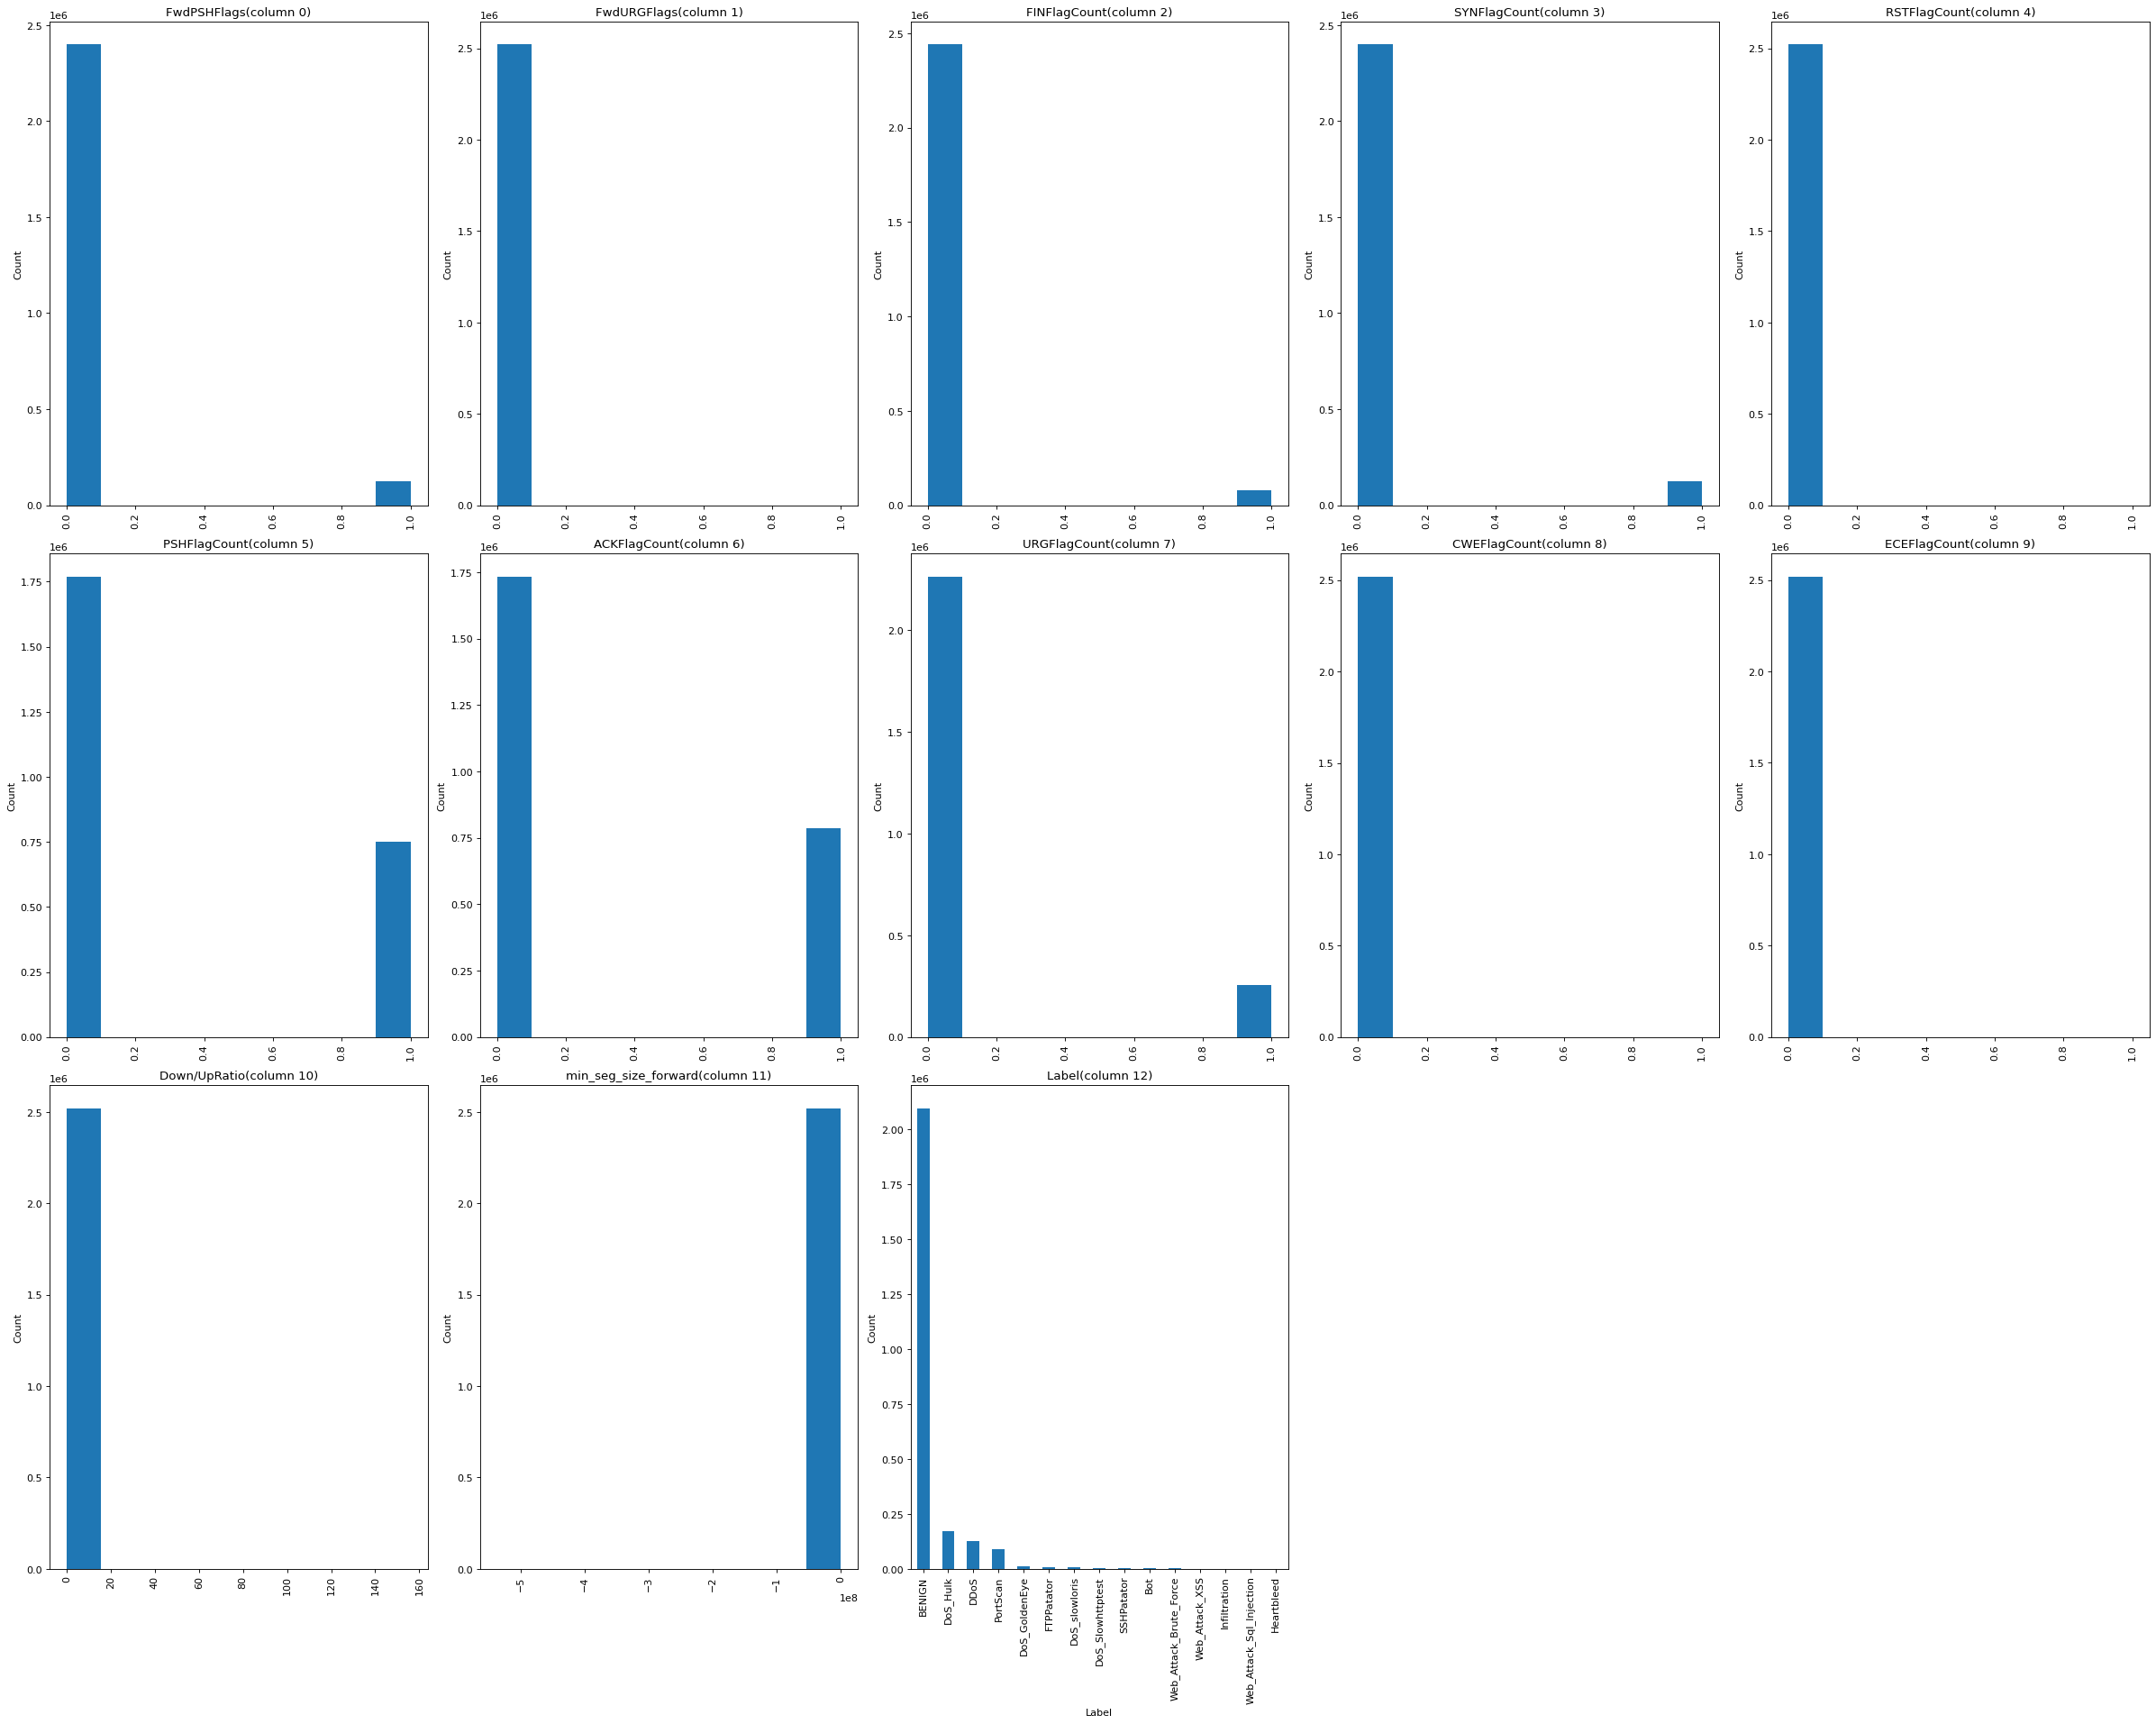

In [12]:
plt.rcParams['figure.figsize'] = (30, 30)

plot_per_column_distribution(df, 79, 5)

In [13]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind='bar')

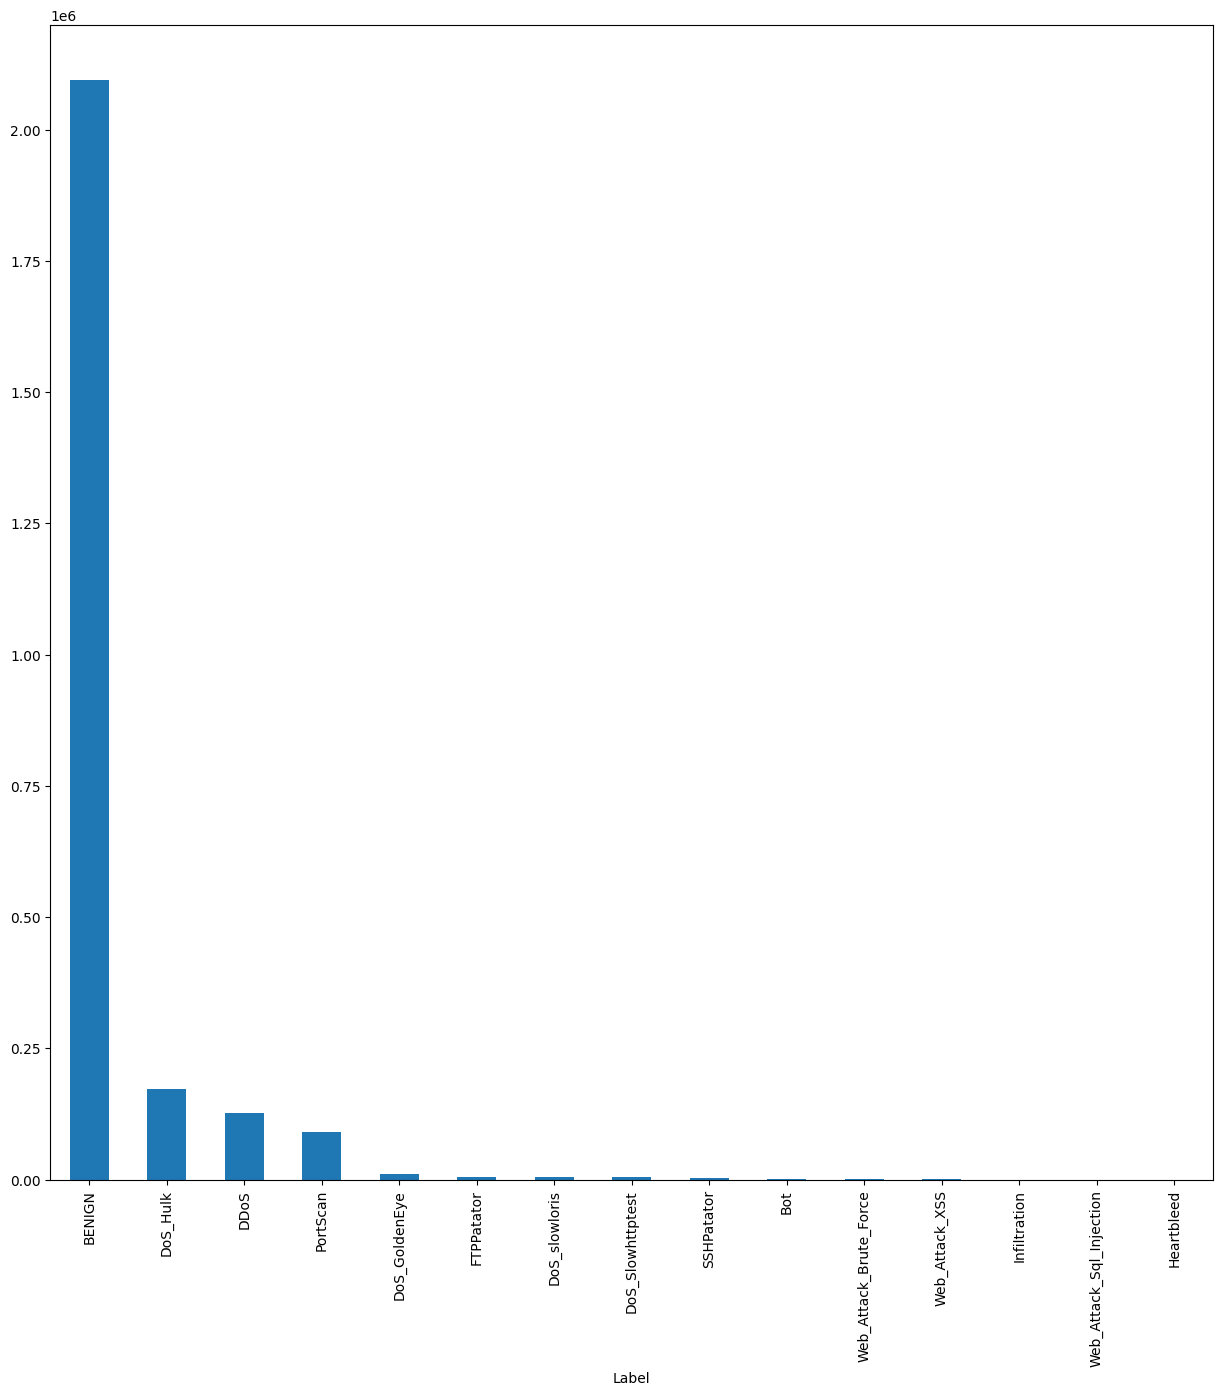

In [14]:
plt.rcParams['figure.figsize'] = [15, 15]
bar_graph("Label")

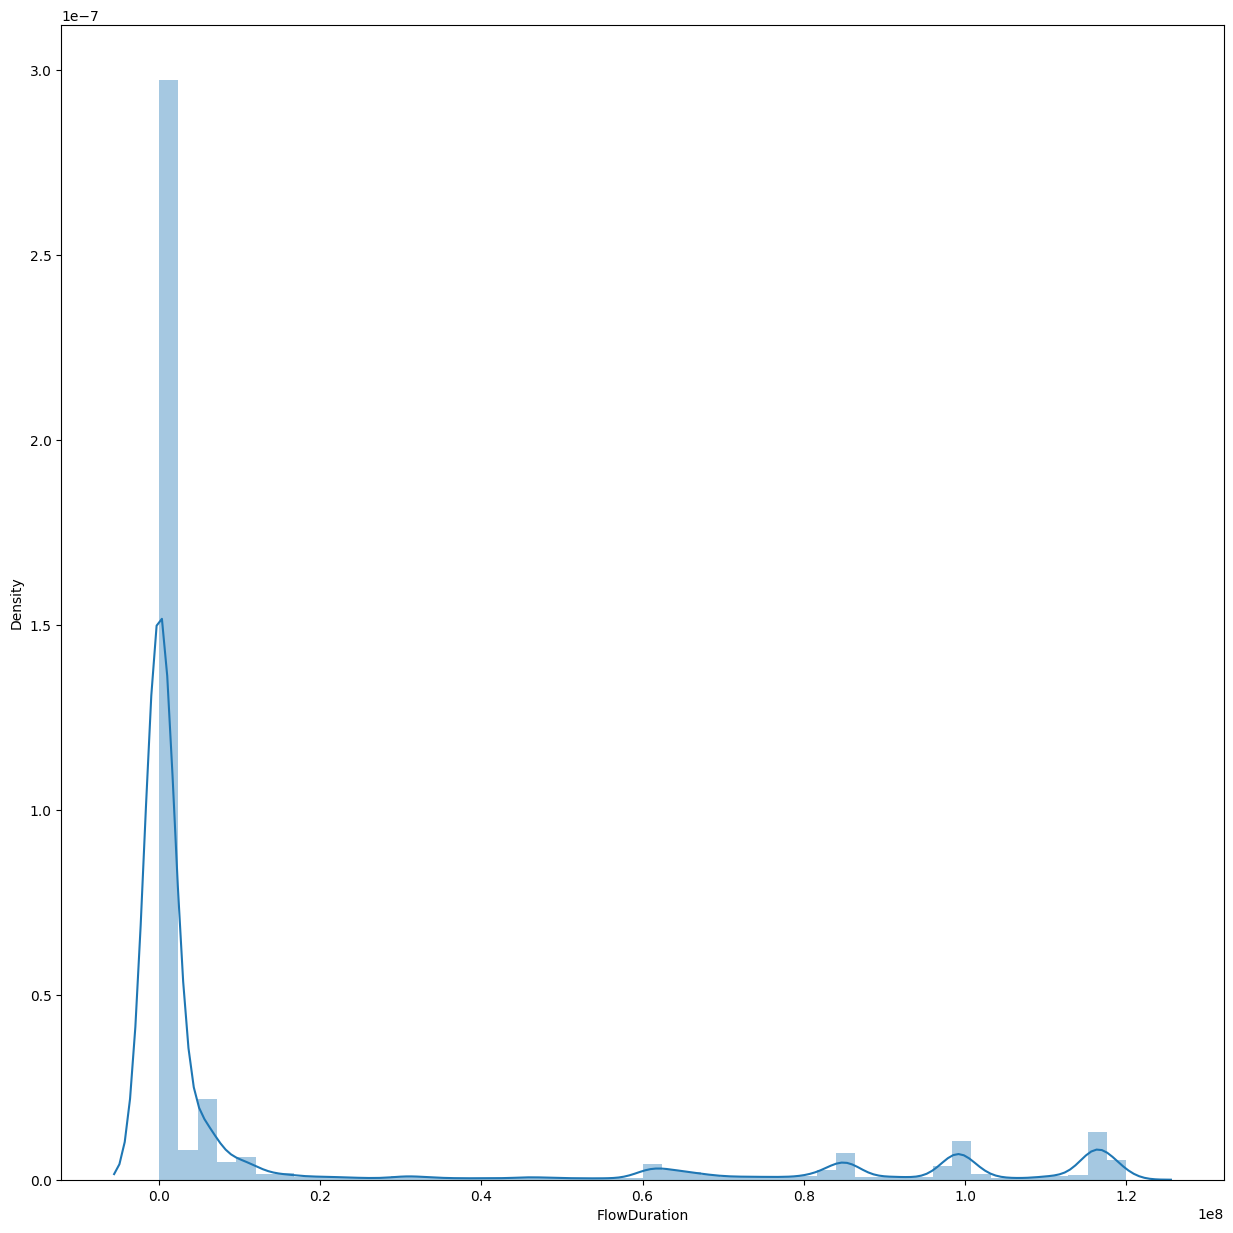

In [15]:
p = sns.distplot(a = df["FlowDuration"])
plt.show()

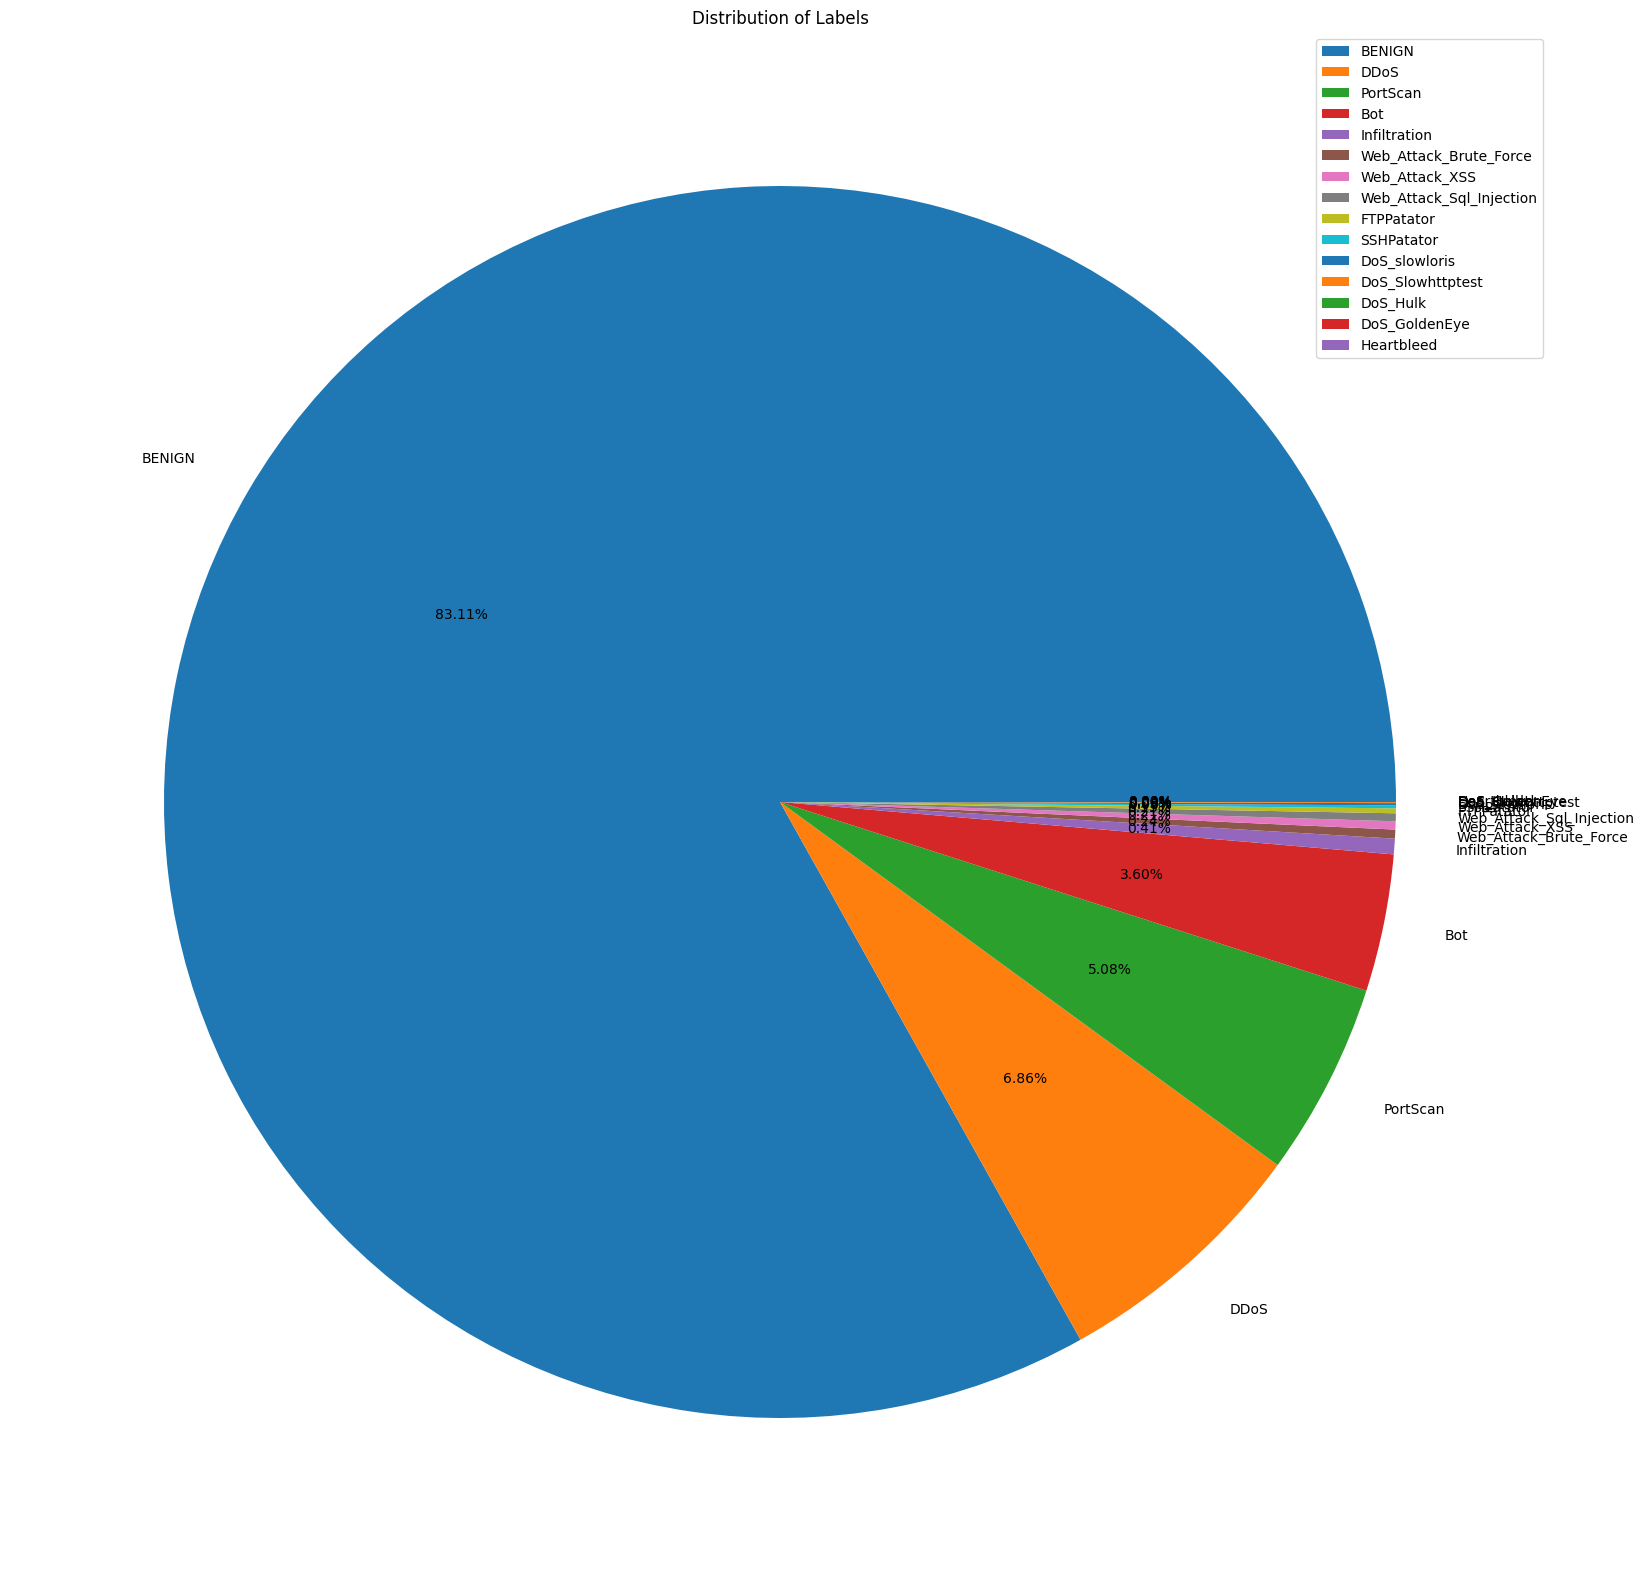

In [16]:
plt.figure(figsize=(20,20))
plt.pie(df['Label'].value_counts(), labels = df['Label'].unique(),autopct='%0.2f%%')
plt.title('Distribution of Labels')
plt.legend()
plt.show()

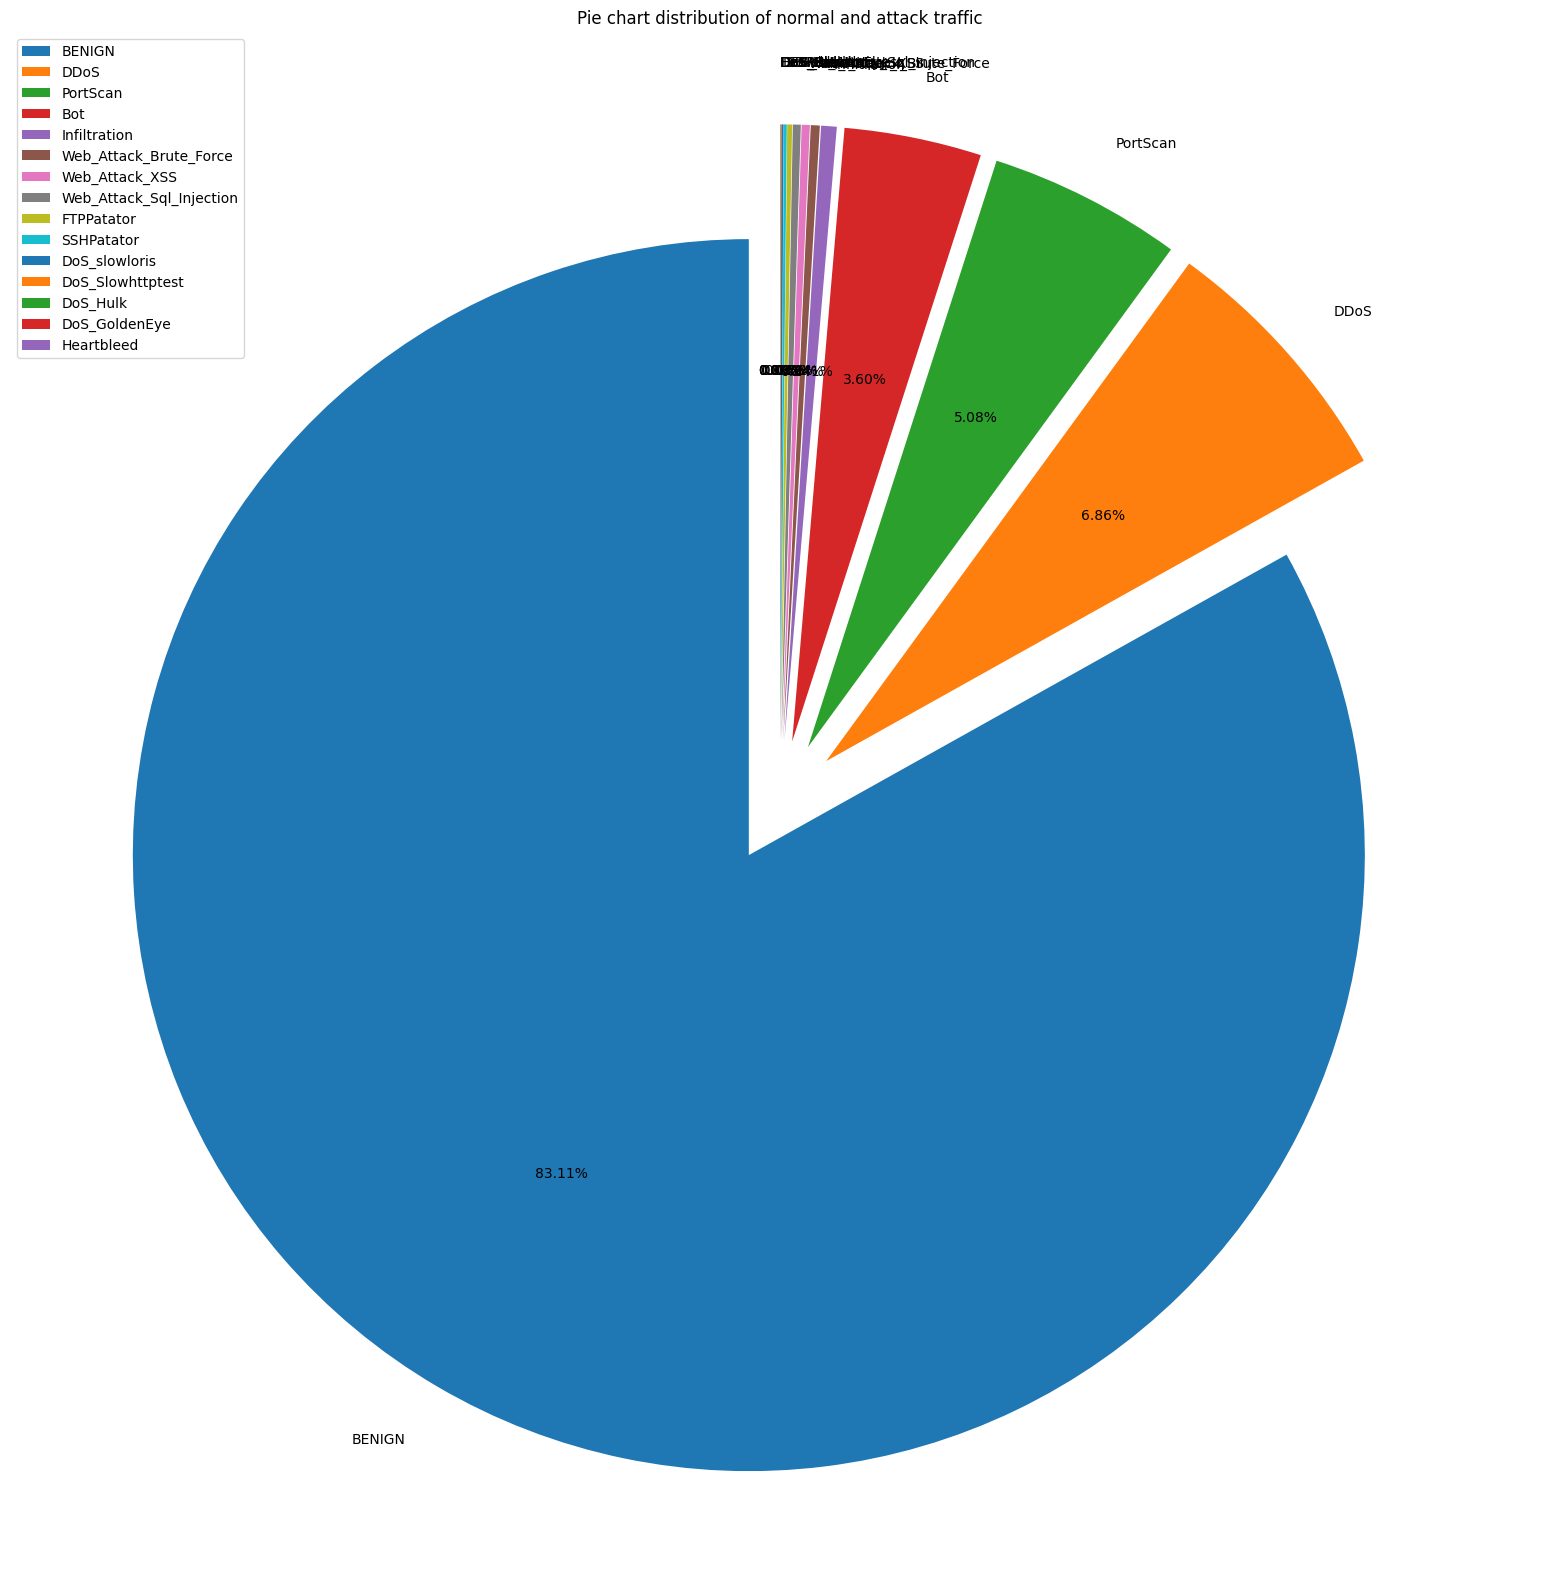

In [17]:
plt.figure(figsize=(20,20))

labels = df['Label'].unique()
sizes = df['Label'].value_counts()
explode = (0.1,)*len(labels) # explode all the slices

plt.pie(sizes, explode=explode, labels=labels, autopct='%0.2f%%', startangle=90)

plt.title('Pie chart distribution of normal and attack traffic')
plt.legend(labels, loc="best")

plt.show()

# Balancing The dataset 

In [11]:
df

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,53.0,32215.0,4.0,2.0,112.0,152.0,28.0,28.0,28.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2520794,53.0,324.0,2.0,2.0,84.0,362.0,42.0,42.0,42.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2520795,58030.0,82.0,2.0,1.0,31.0,6.0,31.0,0.0,15.5,21.92031,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2520796,53.0,1048635.0,6.0,2.0,192.0,256.0,32.0,32.0,32.0,0.00000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [12]:
df['Label'].value_counts()

Label
BENIGN                      2095057
DoS_Hulk                     172846
DDoS                         128014
PortScan                      90694
DoS_GoldenEye                 10286
FTPPatator                     5931
DoS_slowloris                  5385
DoS_Slowhttptest               5228
SSHPatator                     3219
Bot                            1948
Web_Attack_Brute_Force         1470
Web_Attack_XSS                  652
Infiltration                     36
Web_Attack_Sql_Injection         21
Heartbleed                       11
Name: count, dtype: int64

In [13]:
print(df.columns)


Index(['DestinationPort', 'FlowDuration', 'TotalFwdPackets',
       'TotalBackwardPackets', 'TotalLengthofFwdPackets',
       'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin',
       'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax',
       'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd',
       'FlowBytes/s', 'FlowPackets/s', 'FlowIATMean', 'FlowIATStd',
       'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd',
       'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags',
       'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'MaxPacketLength',
       'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount',
       'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount',
       '

In [14]:
df.shape

(2520798, 79)

In [15]:
classes_to_keep = ['DoS_GoldenEye','FTPPatator','DoS_slowloris','DoS_Slowhttptest',
                   'SSHPatator','Bot','Web_Attack_Brute_Force','Web_Attack_XSS','Web_Attack_Sql_Injection',
                   'Infiltration','Heartbleed'
                  ]

classes_to_limit = ['BENIGN','DoS_Hulk','DDoS','PortScan']

df_keep = df[df['Label'].isin(classes_to_keep)]

df_limit = df[df['Label'].isin(classes_to_limit)].groupby('Label').head(50000)

result_df = pd.concat([df_keep,df_limit])

result_df = result_df.sample(frac=1,random_state = 42).reset_index(drop=True)

In [ ]:
classes_to_keep = ['DDoS','DoS',
                   'Bot','Brute_Force','Infiltration',
                   'Web_Attack','Heartbleed','Port_Scan'
                  ]

classes_to_limit = ['BENIGN']

df_keep = df[df['Label'].isin(classes_to_keep)]

df_limit = df[df['Label'].isin(classes_to_limit)].groupby('Label').head(50000)

result_df = pd.concat([df_keep,df_limit])

result_df = result_df.sample(frac=1,random_state = 42).reset_index(drop=True)

In [20]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS_Hulk': 'DoS',
    'DoS_GoldenEye': 'DoS',
    'DoS_slowloris': 'DoS',
    'DoS_Slowhttptest': 'DoS',
    'PortScan': 'Port_Scan',
    'FTPPatator': 'Brute_Force',
    'SSHPatator': 'Brute_Force',
    'Bot': 'Bot',
    'Web_Attack_Brute_Force': 'Web_Attack',
    'Web_Attack_XSS': 'Web_Attack',
    'Web_Attack_Sql_Injection': 'Web_Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
result_df['Label'] = result_df['Label'].map(attack_map)

In [130]:
df_rare = df[df['Label'].isin(['Infiltration', 'Heartbleed'])]
df_rare_oversampled = pd.concat([df_rare]*30).reset_index(drop=True)

result_df = pd.concat([result_df, df_rare_oversampled])
result_df = result_df.sample(frac=1, random_state=42).reset_index(drop=True)


In [16]:
result_df.shape

(234187, 79)

In [17]:
result_df['Label'].value_counts()

Label
PortScan                    50000
DDoS                        50000
BENIGN                      50000
DoS_Hulk                    50000
DoS_GoldenEye               10286
FTPPatator                   5931
DoS_slowloris                5385
DoS_Slowhttptest             5228
SSHPatator                   3219
Bot                          1948
Web_Attack_Brute_Force       1470
Web_Attack_XSS                652
Infiltration                   36
Web_Attack_Sql_Injection       21
Heartbleed                     11
Name: count, dtype: int64

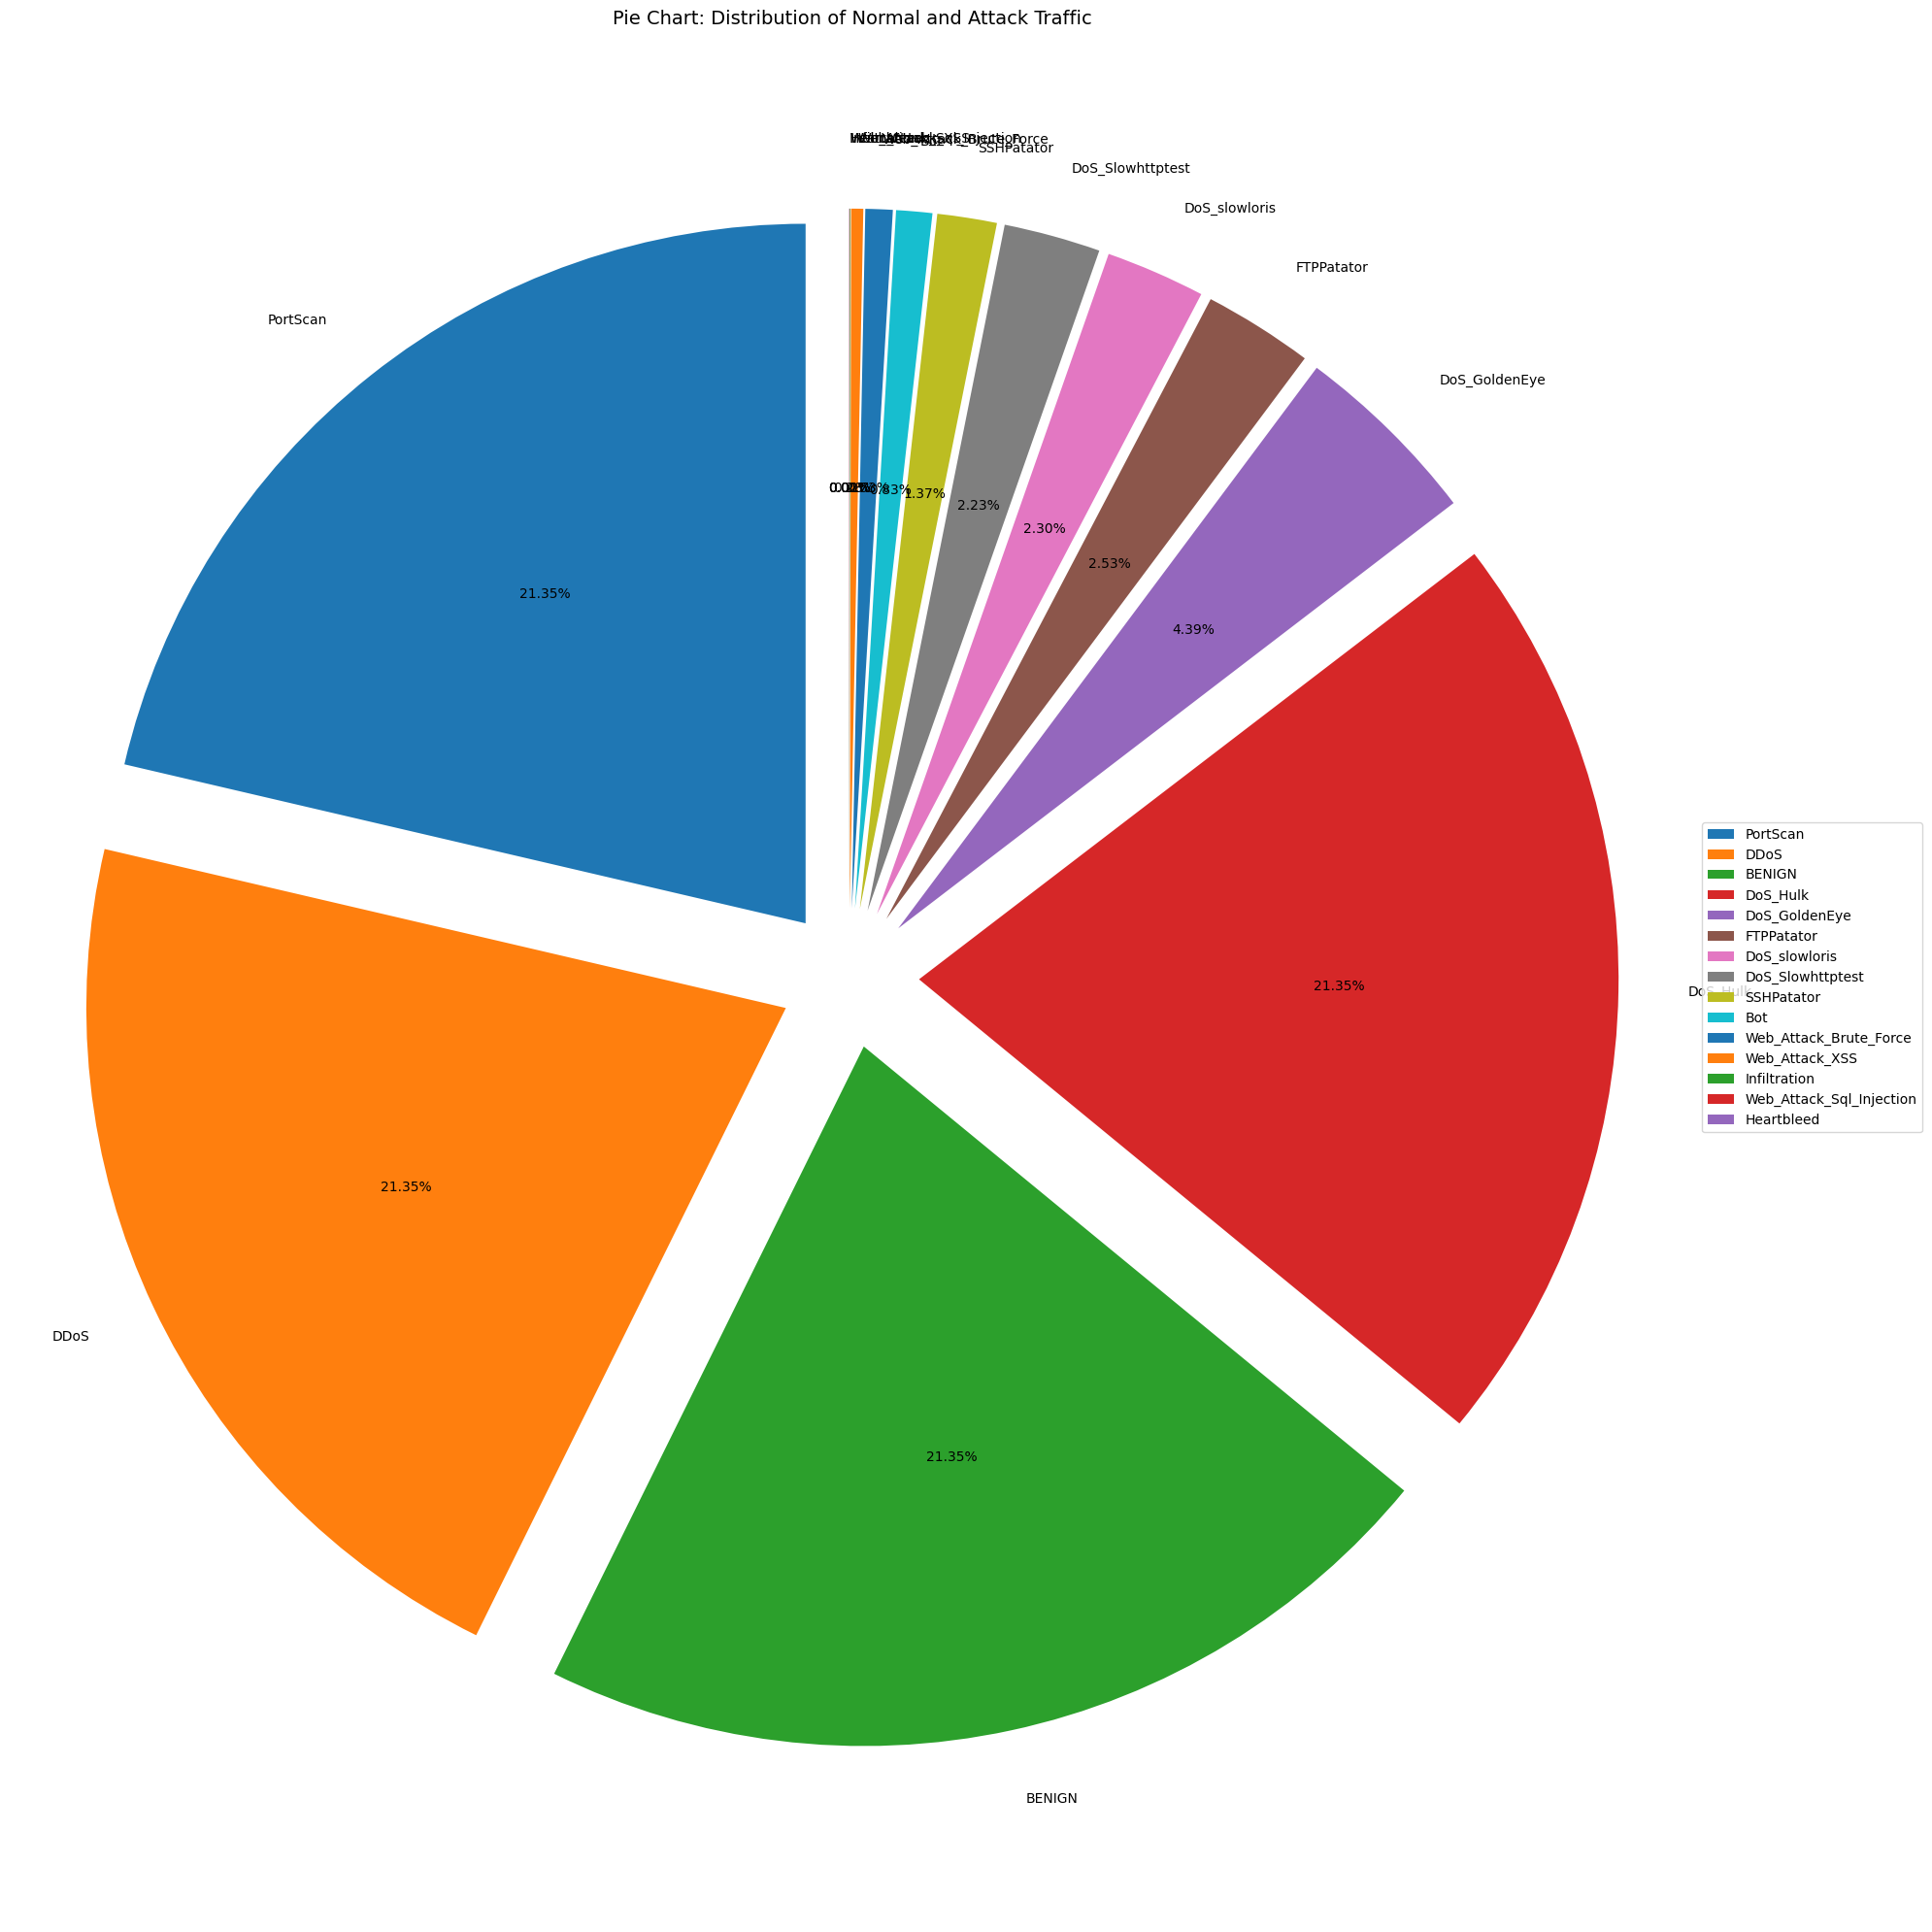

In [18]:
plt.figure(figsize=(20,20))  # ممكن تخليها 20x20 لو الشاشة كبيرة

sizes = result_df['Label'].value_counts()
labels = sizes.index
explode = (0.1,) * len(labels)

plt.pie(sizes, explode=explode, labels=labels, autopct='%0.2f%%', startangle=90)
plt.title('Pie Chart: Distribution of Normal and Attack Traffic', fontsize=14)
plt.axis('equal')  # الدائرة تبقى دائرية فعلاً
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


# Label Encoding

In [40]:
df_encoded = result_df.copy()

le = LabelEncoder()

df_encoded['Label'] = le.fit_transform(result_df['Label'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print(label_mapping)

print("\nEncoded DataFrame:")
df_encoded.head()

{'BENIGN': np.int64(0), 'Bot': np.int64(1), 'DDoS': np.int64(2), 'DoS_GoldenEye': np.int64(3), 'DoS_Hulk': np.int64(4), 'DoS_Slowhttptest': np.int64(5), 'DoS_slowloris': np.int64(6), 'FTPPatator': np.int64(7), 'Heartbleed': np.int64(8), 'Infiltration': np.int64(9), 'PortScan': np.int64(10), 'SSHPatator': np.int64(11), 'Web_Attack_Brute_Force': np.int64(12), 'Web_Attack_Sql_Injection': np.int64(13), 'Web_Attack_XSS': np.int64(14)}

Encoded DataFrame:


,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,10243.0,54.0,1.0,1.0,2.0,6.0,2.0,2.0,2.0,0.000000,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,80.0,3003776.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2,80.0,80387278.0,8.0,5.0,56.0,11607.0,20.0,0.0,7.0,5.656854,...,20.0,1149.0,0.0,1149.0,1149.0,40100000.0,39500000.0,68000000.0,12100000.0,2
3,3945.0,43.0,1.0,1.0,2.0,6.0,2.0,2.0,2.0,0.000000,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
4,80.0,5602494.0,4.0,2.0,12.0,0.0,6.0,0.0,3.0,3.464102,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df_encoded.shape

In [26]:
encoder_file_path = 'Label Encoder/lb_encoder.pkl'

joblib.dump(le, encoder_file_path)

['Label Encoder/lb_encoder.pkl']

# Correlation 

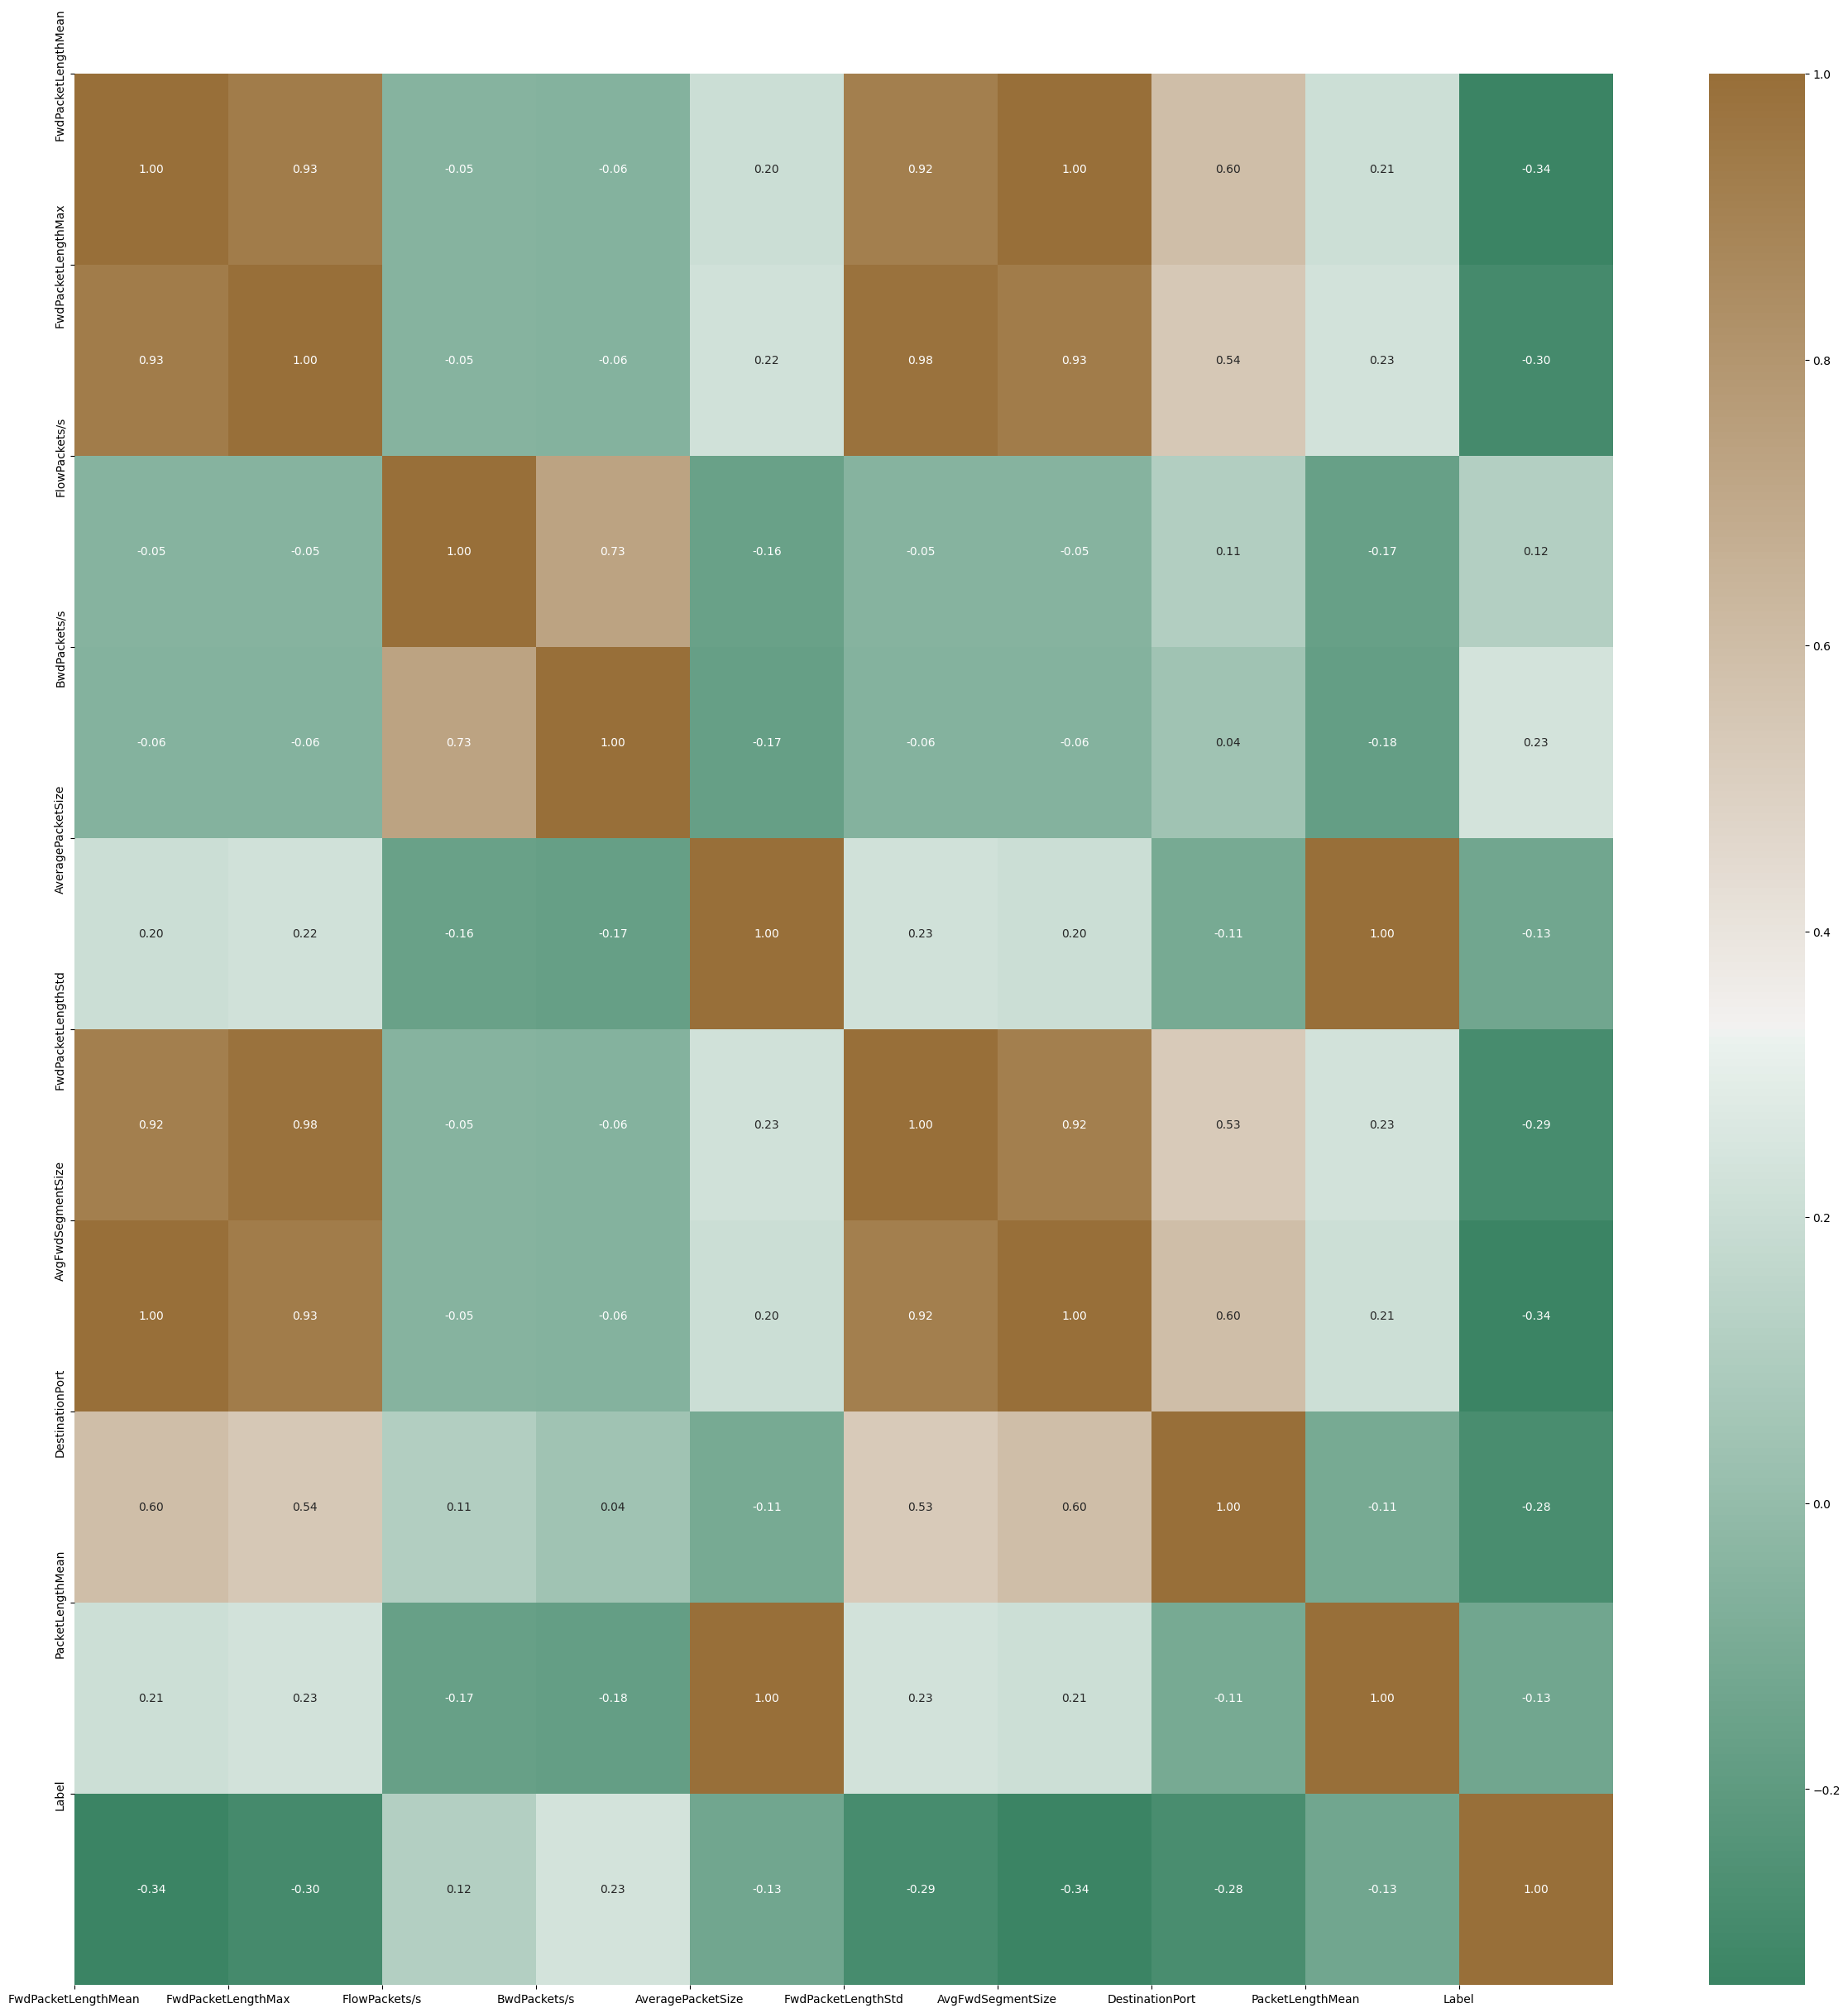

In [40]:
correlation_threshold = 0.1

corr = df_encoded.corr()

columns_to_include = corr.columns[abs(corr["Label"]) > correlation_threshold]
filtered_corr = corr.loc[columns_to_include, columns_to_include]

fig,ax = plt.subplots(figsize=(30,30))
colormap = sns.diverging_palette(150, 50, as_cmap=True)
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap=colormap)
plt.xticks(range(len(filtered_corr.columns)), filtered_corr.columns)
plt.yticks(range(len(filtered_corr.columns)), filtered_corr.columns)
plt.show()

# (5) Feature Selection

In [20]:
x = result_df.drop(columns=['Label'],axis=1)
y = result_df['Label'] 

In [21]:
result_df

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,min_seg_size_forward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,10243.0,54.0,1.0,1.0,2.0,6.0,2.0,2.0,2.000000,0.000000,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan
1,80.0,3003776.0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS_slowloris
2,80.0,80387278.0,8.0,5.0,56.0,11607.0,20.0,0.0,7.000000,5.656854,...,20.0,1149.0,0.0,1149.0,1149.0,40100000.0,39500000.0,68000000.0,12100000.0,DDoS
3,3945.0,43.0,1.0,1.0,2.0,6.0,2.0,2.0,2.000000,0.000000,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan
4,80.0,5602494.0,4.0,2.0,12.0,0.0,6.0,0.0,3.000000,3.464102,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234182,63113.0,82411932.0,7.0,9.0,11607.0,62.0,2920.0,0.0,1658.142857,1547.602062,...,20.0,4058513.0,0.0,4058513.0,4058513.0,77800000.0,0.0,77800000.0,77800000.0,BENIGN
234183,57519.0,4027984.0,1.0,6.0,1375.0,30.0,1375.0,1375.0,1375.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
234184,53.0,49415.0,2.0,2.0,62.0,106.0,31.0,31.0,31.000000,0.000000,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
234185,1334.0,59.0,1.0,1.0,2.0,6.0,2.0,2.0,2.000000,0.000000,...,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan


In [22]:
y

0              PortScan
1         DoS_slowloris
2                  DDoS
3              PortScan
4                BENIGN
              ...      
234182           BENIGN
234183           BENIGN
234184           BENIGN
234185         PortScan
234186           BENIGN
Name: Label, Length: 234187, dtype: object

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((187349, 78), (46838, 78), (187349,), (46838,))

* Trains a Random Forest and extracts feature importance values.

In [24]:
re_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
re_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

* Creates a DataFrame and sorts the features based on their importance.

In [27]:
feature_importances = re_classifier.feature_importances_

feature_importances_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

top_features = feature_importances_df.head(20)['Feature'].tolist()

df_top_features = result_df[top_features + ['Label']]

df_top_features.head()

,FwdPacketLengthMean,FwdPacketLengthMax,FlowIATMax,SubflowBwdBytes,Init_Win_bytes_backward,TotalLengthofBwdPackets,FlowPackets/s,TotalLengthofFwdPackets,BwdPackets/s,AveragePacketSize,...,BwdPacketLengthMean,SubflowFwdBytes,AvgBwdSegmentSize,FwdPacketLengthStd,AvgFwdSegmentSize,DestinationPort,BwdHeaderLength,PacketLengthMean,BwdPacketLengthStd,Label
0,2.0,2.0,54.0,6.0,0.0,6.0,37037.037040,2.0,18518.518520,5.000000,...,6.0,2.0,6.0,0.000000,2.0,10243.0,20.0,3.333333,0.000000,PortScan
1,0.0,0.0,2003984.0,0.0,-1.0,0.0,0.998743,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,80.0,0.0,0.000000,0.000000,DoS_slowloris
2,7.0,20.0,68000000.0,11607.0,229.0,11607.0,0.161717,56.0,0.062199,897.615385,...,2321.4,56.0,2321.4,5.656854,7.0,80.0,112.0,833.500000,3802.315321,DDoS
3,2.0,2.0,43.0,6.0,0.0,6.0,46511.627910,2.0,23255.813950,5.000000,...,6.0,2.0,6.0,0.000000,2.0,3945.0,20.0,3.333333,0.000000,PortScan
4,3.0,6.0,4581562.0,0.0,29200.0,0.0,1.070952,12.0,0.356984,2.000000,...,0.0,12.0,0.0,3.464102,3.0,80.0,64.0,1.714286,0.000000,BENIGN


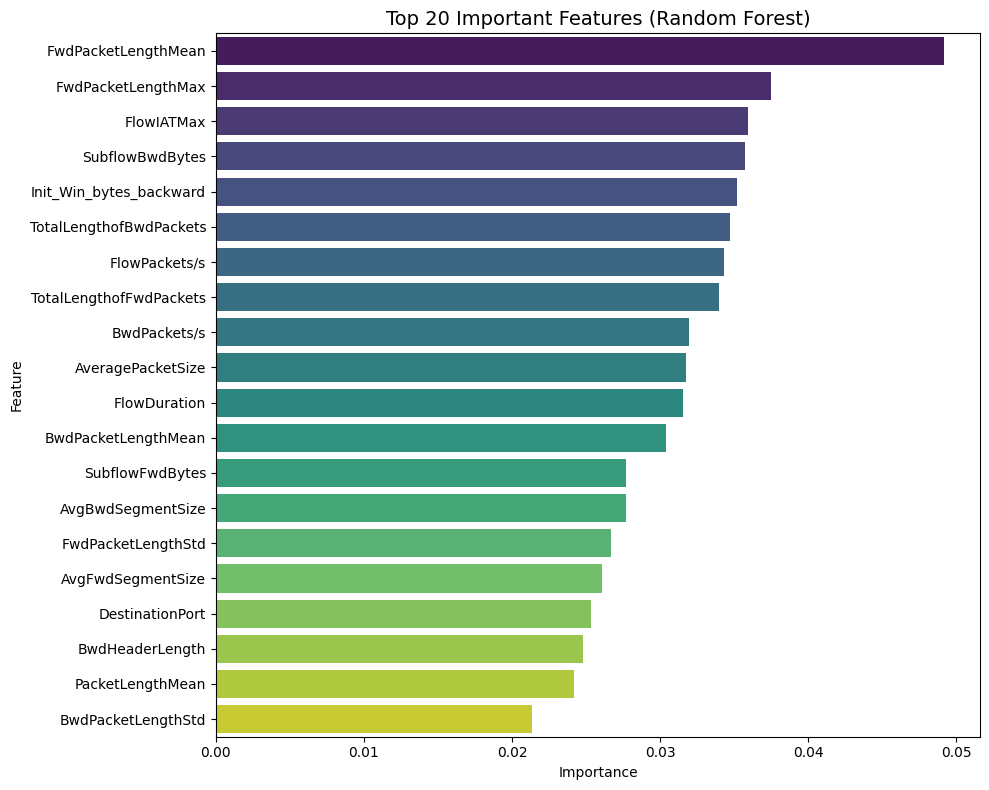

In [28]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(20), palette='viridis')
plt.title('Top 20 Important Features (Random Forest)', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [29]:
df_top_features.shape

(234187, 21)

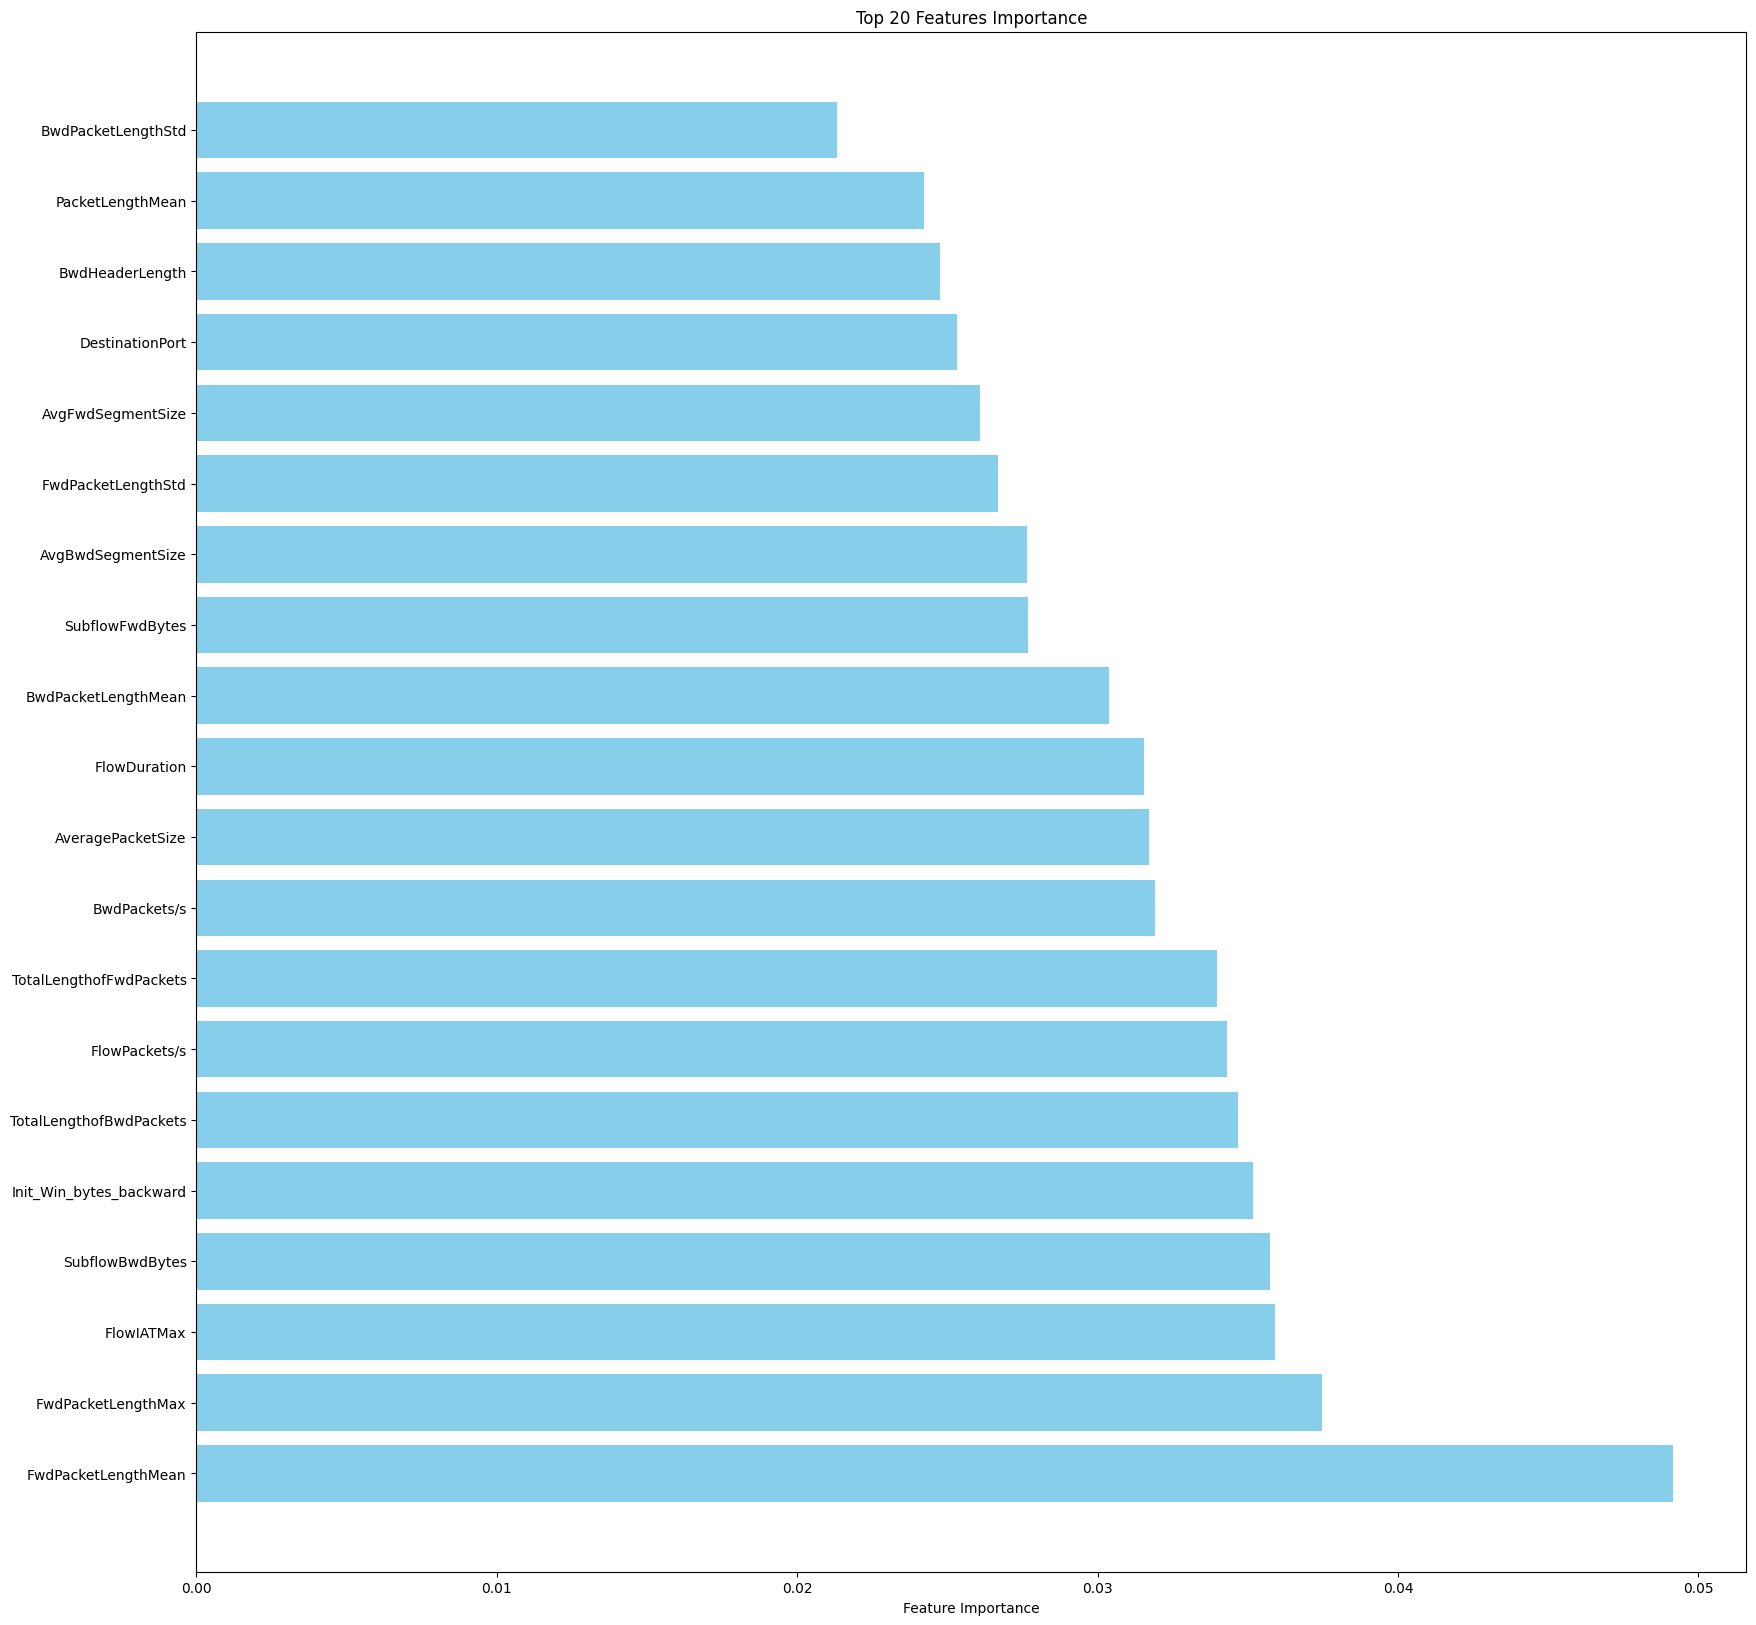

In [30]:
plt.figure(figsize=(20,20))
plt.barh(top_features, feature_importances_df.head(20)['Importance'],color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 20 Features Importance')
plt.show()

In [31]:
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

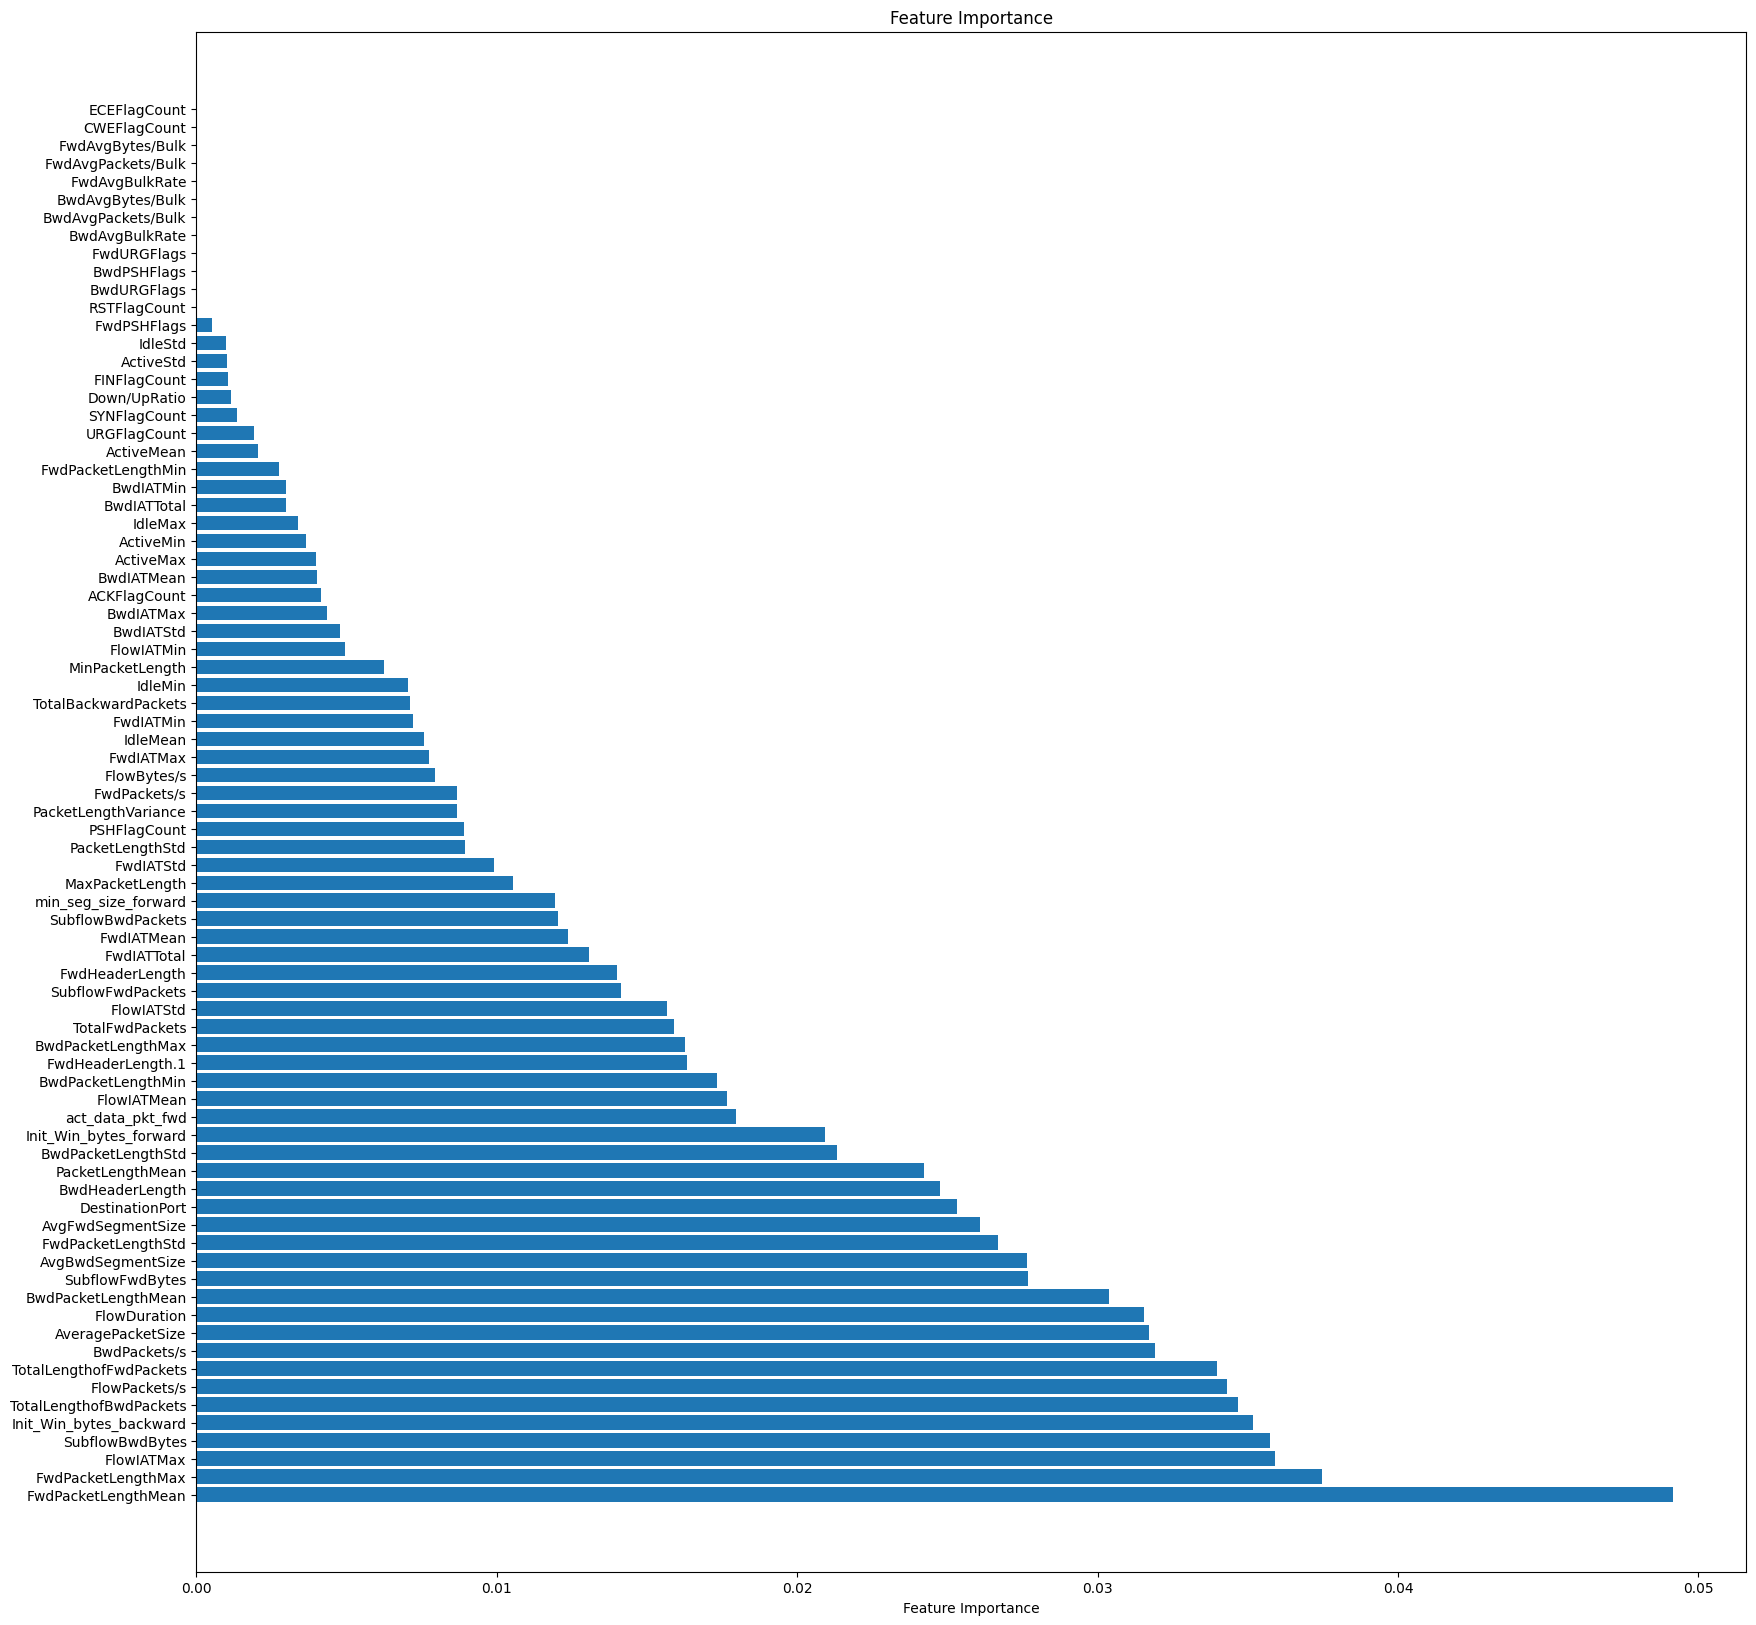

In [32]:
plt.figure(figsize=(20,20))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

In [33]:
df_top_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234187 entries, 0 to 234186
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FwdPacketLengthMean      234187 non-null  float64
 1   FwdPacketLengthMax       234187 non-null  float64
 2   FlowIATMax               234187 non-null  float64
 3   SubflowBwdBytes          234187 non-null  float64
 4   Init_Win_bytes_backward  234187 non-null  float64
 5   TotalLengthofBwdPackets  234187 non-null  float64
 6   FlowPackets/s            234187 non-null  float64
 7   TotalLengthofFwdPackets  234187 non-null  float64
 8   BwdPackets/s             234187 non-null  float64
 9   AveragePacketSize        234187 non-null  float64
 10  FlowDuration             234187 non-null  float64
 11  BwdPacketLengthMean      234187 non-null  float64
 12  SubflowFwdBytes          234187 non-null  float64
 13  AvgBwdSegmentSize        234187 non-null  float64
 14  FwdP

In [34]:
df_top_features.shape

(234187, 21)

In [35]:
y.value_counts()

Label
PortScan                    50000
DDoS                        50000
BENIGN                      50000
DoS_Hulk                    50000
DoS_GoldenEye               10286
FTPPatator                   5931
DoS_slowloris                5385
DoS_Slowhttptest             5228
SSHPatator                   3219
Bot                          1948
Web_Attack_Brute_Force       1470
Web_Attack_XSS                652
Infiltration                   36
Web_Attack_Sql_Injection       21
Heartbleed                     11
Name: count, dtype: int64

In [36]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS_Hulk': 'DoS',
    'DoS_GoldenEye': 'DoS',
    'DoS_slowloris': 'DoS',
    'DoS_Slowhttptest': 'DoS',
    'PortScan': 'Port_Scan',
    'FTPPatator': 'Brute_Force',
    'SSHPatator': 'Brute_Force',
    'Bot': 'Bot',
    'Web_Attack_Brute_Force': 'Web_Attack',
    'Web_Attack_XSS': 'Web_Attack',
    'Web_Attack_Sql_Injection': 'Web_Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
df_top_features['Label'] = df_top_features['Label'].map(attack_map)

In [37]:
df_rare = df_top_features[df_top_features['Label'].isin(['Infiltration', 'Heartbleed'])]
df_rare_oversampled = pd.concat([df_rare]*30).reset_index(drop=True)

df_top_features = pd.concat([df_top_features, df_rare_oversampled])
result_df = df_top_features.sample(frac=1, random_state=42).reset_index(drop=True)

In [38]:
df_top_features['Label'].value_counts()

Label
DoS             70899
Port_Scan       50000
DDoS            50000
BENIGN          50000
Brute_Force      9150
Web_Attack       2143
Bot              1948
Infiltration     1116
Heartbleed        341
Name: count, dtype: int64

In [39]:
df_encoded = df_top_features.copy()

le = LabelEncoder()

df_encoded['Label'] = le.fit_transform(df_top_features['Label'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print(label_mapping)

print("\nEncoded DataFrame:")
df_encoded.head()

{'BENIGN': np.int64(0), 'Bot': np.int64(1), 'Brute_Force': np.int64(2), 'DDoS': np.int64(3), 'DoS': np.int64(4), 'Heartbleed': np.int64(5), 'Infiltration': np.int64(6), 'Port_Scan': np.int64(7), 'Web_Attack': np.int64(8)}

Encoded DataFrame:


,FwdPacketLengthMean,FwdPacketLengthMax,FlowIATMax,SubflowBwdBytes,Init_Win_bytes_backward,TotalLengthofBwdPackets,FlowPackets/s,TotalLengthofFwdPackets,BwdPackets/s,AveragePacketSize,...,BwdPacketLengthMean,SubflowFwdBytes,AvgBwdSegmentSize,FwdPacketLengthStd,AvgFwdSegmentSize,DestinationPort,BwdHeaderLength,PacketLengthMean,BwdPacketLengthStd,Label
0,2.0,2.0,54.0,6.0,0.0,6.0,37037.037040,2.0,18518.518520,5.000000,...,6.0,2.0,6.0,0.000000,2.0,10243.0,20.0,3.333333,0.000000,7
1,0.0,0.0,2003984.0,0.0,-1.0,0.0,0.998743,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,80.0,0.0,0.000000,0.000000,4
2,7.0,20.0,68000000.0,11607.0,229.0,11607.0,0.161717,56.0,0.062199,897.615385,...,2321.4,56.0,2321.4,5.656854,7.0,80.0,112.0,833.500000,3802.315321,3
3,2.0,2.0,43.0,6.0,0.0,6.0,46511.627910,2.0,23255.813950,5.000000,...,6.0,2.0,6.0,0.000000,2.0,3945.0,20.0,3.333333,0.000000,7
4,3.0,6.0,4581562.0,0.0,29200.0,0.0,1.070952,12.0,0.356984,2.000000,...,0.0,12.0,0.0,3.464102,3.0,80.0,64.0,1.714286,0.000000,0


In [40]:
df_encoded.shape

(235597, 21)

In [41]:
encoder_file_path = 'Label Encoder/tst_lb_encoder.pkl'

joblib.dump(le, encoder_file_path)

['Label Encoder/tst_lb_encoder.pkl']

In [42]:
df_encoded

,FwdPacketLengthMean,FwdPacketLengthMax,FlowIATMax,SubflowBwdBytes,Init_Win_bytes_backward,TotalLengthofBwdPackets,FlowPackets/s,TotalLengthofFwdPackets,BwdPackets/s,AveragePacketSize,...,BwdPacketLengthMean,SubflowFwdBytes,AvgBwdSegmentSize,FwdPacketLengthStd,AvgFwdSegmentSize,DestinationPort,BwdHeaderLength,PacketLengthMean,BwdPacketLengthStd,Label
0,2.000000,2.0,54.0,6.0,0.0,6.0,37037.037040,2.0,18518.518520,5.000000,...,6.000000,2.0,6.000000,0.000000,2.000000,10243.0,20.0,3.333333,0.000000,7
1,0.000000,0.0,2003984.0,0.0,-1.0,0.0,0.998743,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,80.0,0.0,0.000000,0.000000,4
2,7.000000,20.0,68000000.0,11607.0,229.0,11607.0,0.161717,56.0,0.062199,897.615385,...,2321.400000,56.0,2321.400000,5.656854,7.000000,80.0,112.0,833.500000,3802.315321,3
3,2.000000,2.0,43.0,6.0,0.0,6.0,46511.627910,2.0,23255.813950,5.000000,...,6.000000,2.0,6.000000,0.000000,2.000000,3945.0,20.0,3.333333,0.000000,7
4,3.000000,6.0,4581562.0,0.0,29200.0,0.0,1.070952,12.0,0.356984,2.000000,...,0.000000,12.0,0.000000,3.464102,3.000000,80.0,64.0,1.714286,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,6.000000,6.0,20.0,0.0,-1.0,0.0,100000.000000,12.0,0.000000,9.000000,...,0.000000,12.0,0.000000,0.000000,6.000000,444.0,0.0,6.000000,0.000000,6
1406,518.940793,1274.0,9432176.0,33406.0,3294.0,33406.0,92.072932,2866110.0,46.044800,262.447140,...,6.046335,2866110.0,6.046335,204.203530,518.940793,444.0,110512.0,262.423387,3.512318,6
1407,340.182540,1027.0,49900000.0,3024.0,3294.0,3024.0,8.660290,171452.0,4.330145,173.097222,...,6.000000,171452.0,6.000000,232.817897,340.182540,444.0,10080.0,172.925669,0.000000,6
1408,186.850000,705.0,55000000.0,120.0,1063.0,120.0,0.573769,3737.0,0.286884,97.325000,...,6.000000,3737.0,6.000000,227.161032,186.850000,444.0,400.0,94.951220,0.000000,6


In [43]:
df_encoded.to_csv("Dt/tst2_Cleaned_CIC_IDS2017_full_week.csv", index=False)

In [44]:
df_top_features = None

# (6) Split Data into Features & Labels

In [45]:
dataset = pd.read_csv("Dt/tst2_Cleaned_CIC_IDS2017_full_week.csv")

In [46]:
dataset

,FwdPacketLengthMean,FwdPacketLengthMax,FlowIATMax,SubflowBwdBytes,Init_Win_bytes_backward,TotalLengthofBwdPackets,FlowPackets/s,TotalLengthofFwdPackets,BwdPackets/s,AveragePacketSize,...,BwdPacketLengthMean,SubflowFwdBytes,AvgBwdSegmentSize,FwdPacketLengthStd,AvgFwdSegmentSize,DestinationPort,BwdHeaderLength,PacketLengthMean,BwdPacketLengthStd,Label
0,2.000000,2.0,54.0,6.0,0.0,6.0,37037.037040,2.0,18518.518520,5.000000,...,6.000000,2.0,6.000000,0.000000,2.000000,10243.0,20.0,3.333333,0.000000,7
1,0.000000,0.0,2003984.0,0.0,-1.0,0.0,0.998743,0.0,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,80.0,0.0,0.000000,0.000000,4
2,7.000000,20.0,68000000.0,11607.0,229.0,11607.0,0.161717,56.0,0.062199,897.615385,...,2321.400000,56.0,2321.400000,5.656854,7.000000,80.0,112.0,833.500000,3802.315321,3
3,2.000000,2.0,43.0,6.0,0.0,6.0,46511.627910,2.0,23255.813950,5.000000,...,6.000000,2.0,6.000000,0.000000,2.000000,3945.0,20.0,3.333333,0.000000,7
4,3.000000,6.0,4581562.0,0.0,29200.0,0.0,1.070952,12.0,0.356984,2.000000,...,0.000000,12.0,0.000000,3.464102,3.000000,80.0,64.0,1.714286,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235592,6.000000,6.0,20.0,0.0,-1.0,0.0,100000.000000,12.0,0.000000,9.000000,...,0.000000,12.0,0.000000,0.000000,6.000000,444.0,0.0,6.000000,0.000000,6
235593,518.940793,1274.0,9432176.0,33406.0,3294.0,33406.0,92.072932,2866110.0,46.044800,262.447140,...,6.046335,2866110.0,6.046335,204.203530,518.940793,444.0,110512.0,262.423387,3.512318,6
235594,340.182540,1027.0,49900000.0,3024.0,3294.0,3024.0,8.660290,171452.0,4.330145,173.097222,...,6.000000,171452.0,6.000000,232.817897,340.182540,444.0,10080.0,172.925669,0.000000,6
235595,186.850000,705.0,55000000.0,120.0,1063.0,120.0,0.573769,3737.0,0.286884,97.325000,...,6.000000,3737.0,6.000000,227.161032,186.850000,444.0,400.0,94.951220,0.000000,6


In [47]:
X = dataset.drop('Label',axis=1)
y = dataset['Label']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [49]:
X_train

,FwdPacketLengthMean,FwdPacketLengthMax,FlowIATMax,SubflowBwdBytes,Init_Win_bytes_backward,TotalLengthofBwdPackets,FlowPackets/s,TotalLengthofFwdPackets,BwdPackets/s,AveragePacketSize,FlowDuration,BwdPacketLengthMean,SubflowFwdBytes,AvgBwdSegmentSize,FwdPacketLengthStd,AvgFwdSegmentSize,DestinationPort,BwdHeaderLength,PacketLengthMean,BwdPacketLengthStd
131227,40.375000,317.0,83000000.0,11595.0,235.0,11595.0,0.168415,323.0,0.072178,851.285714,83128155.0,1932.500000,323.0,1932.500000,111.793097,40.375000,80.0,200.0,794.533333,2181.008184
149877,2.000000,2.0,21.0,6.0,0.0,6.0,95238.095240,2.0,47619.047620,5.000000,21.0,6.000000,2.0,6.000000,0.000000,2.000000,1461.0,20.0,3.333333,0.000000
183524,77.200000,374.0,97400000.0,11595.0,235.0,11595.0,0.123009,386.0,0.071755,998.916667,97553754.0,1656.428571,386.0,1656.428571,165.943364,77.200000,80.0,232.0,922.076923,1760.597234
23439,8.666667,20.0,587633.0,11607.0,229.0,11607.0,13.585895,26.0,8.491184,1454.125000,588846.0,2321.400000,26.0,2321.400000,10.263203,8.666667,80.0,112.0,1292.555556,4413.201989
72820,42.250000,373.0,59000000.0,24414.0,972.0,24414.0,0.652955,845.0,0.318106,647.666667,59728425.0,1284.947368,845.0,1284.947368,100.213391,42.250000,443.0,616.0,631.475000,969.112221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203069,68.666667,412.0,98300000.0,11595.0,235.0,11595.0,0.132234,412.0,0.071203,923.615385,98310910.0,1656.428571,412.0,1656.428571,168.198296,68.666667,80.0,232.0,857.642857,1947.638216
33415,2.000000,2.0,98.0,6.0,0.0,6.0,20408.163270,2.0,10204.081630,5.000000,98.0,6.000000,2.0,6.000000,0.000000,2.000000,2003.0,20.0,3.333333,0.000000
86198,6.000000,6.0,195831.0,30.0,0.0,30.0,26.410078,6.0,22.008398,7.000000,227186.0,6.000000,6.0,6.000000,0.000000,6.000000,54606.0,100.0,6.000000,0.000000
51707,2.000000,2.0,72.0,6.0,0.0,6.0,27777.777780,2.0,13888.888890,5.000000,72.0,6.000000,2.0,6.000000,0.000000,2.000000,19780.0,20.0,3.333333,0.000000


# (7) Feature Scaling

Purpose of Feature Scaling:
Normalize Feature Ranges
Transforms all features to a common scale, typically between 0 and 1.

Prevents features with larger ranges from dominating models that are sensitive to magnitude.

Improve Algorithm Performance
SVM, KNN, Logistic Regression, and Neural Networks are highly sensitive to feature scales.

Makes gradient descent converge faster in models that use it.

Ensure Fair Feature Contribution
Without scaling, features like "Packet Size (0–10000)" can dominate others like "Protocol (0–3)".



In [50]:
# Fit only on training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on train
X_test_scaled = scaler.transform(X_test)        # Transform only on test

In [51]:
# Optional: convert back to DataFrame (use original column names if needed)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [53]:
joblib.dump(scaler, 'Scaler/scaler_minmax.save')

['Scaler/scaler_minmax.save']

In [54]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188477 entries, 0 to 188476
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FwdPacketLengthMean      188477 non-null  float64
 1   FwdPacketLengthMax       188477 non-null  float64
 2   FlowIATMax               188477 non-null  float64
 3   SubflowBwdBytes          188477 non-null  float64
 4   Init_Win_bytes_backward  188477 non-null  float64
 5   TotalLengthofBwdPackets  188477 non-null  float64
 6   FlowPackets/s            188477 non-null  float64
 7   TotalLengthofFwdPackets  188477 non-null  float64
 8   BwdPackets/s             188477 non-null  float64
 9   AveragePacketSize        188477 non-null  float64
 10  FlowDuration             188477 non-null  float64
 11  BwdPacketLengthMean      188477 non-null  float64
 12  SubflowFwdBytes          188477 non-null  float64
 13  AvgBwdSegmentSize        188477 non-null  float64
 14  FwdP

In [55]:
X_train_scaled.head()

,FwdPacketLengthMean,FwdPacketLengthMax,FlowIATMax,SubflowBwdBytes,Init_Win_bytes_backward,TotalLengthofBwdPackets,FlowPackets/s,TotalLengthofFwdPackets,BwdPackets/s,AveragePacketSize,FlowDuration,BwdPacketLengthMean,SubflowFwdBytes,AvgBwdSegmentSize,FwdPacketLengthStd,AvgFwdSegmentSize,DestinationPort,BwdHeaderLength,PacketLengthMean,BwdPacketLengthStd
0,0.006796,0.013570,6.916667e-01,1.470993e-03,0.003601,1.470993e-03,5.056239e-08,1.126963e-04,3.608886e-08,0.361173,6.927379e-01,0.442150,1.126963e-04,0.442150,0.015858,0.006796,0.001221,0.001810,0.410223,0.324761
1,0.000337,0.000086,1.666667e-07,7.611864e-07,0.000015,7.611864e-07,3.174603e-02,6.978099e-07,2.380952e-02,0.002121,1.666674e-07,0.001373,6.978099e-07,0.001373,0.000000,0.000337,0.022294,0.000181,0.001721,0.000000
2,0.012995,0.016010,8.116667e-01,1.470993e-03,0.003601,1.470993e-03,3.542721e-08,1.346773e-04,3.587766e-08,0.423809,8.129517e-01,0.378986,1.346773e-04,0.378986,0.023540,0.012995,0.001221,0.002099,0.476074,0.262160
3,0.001459,0.000856,4.896933e-03,1.472515e-03,0.003510,1.472515e-03,4.523056e-06,9.071529e-06,4.245592e-06,0.616939,4.907065e-03,0.531129,9.071529e-06,0.531129,0.001456,0.001459,0.001221,0.001013,0.667355,0.657143
4,0.007112,0.015967,4.916667e-01,3.097267e-03,0.014847,3.097267e-03,2.120760e-07,2.948247e-04,1.590532e-07,0.274784,4.977392e-01,0.293992,2.948247e-04,0.293992,0.014216,0.007112,0.006760,0.005574,0.326035,0.144305


In [56]:
X_train_scaled.head()

,FwdPacketLengthMean,FwdPacketLengthMax,FlowIATMax,SubflowBwdBytes,Init_Win_bytes_backward,TotalLengthofBwdPackets,FlowPackets/s,TotalLengthofFwdPackets,BwdPackets/s,AveragePacketSize,FlowDuration,BwdPacketLengthMean,SubflowFwdBytes,AvgBwdSegmentSize,FwdPacketLengthStd,AvgFwdSegmentSize,DestinationPort,BwdHeaderLength,PacketLengthMean,BwdPacketLengthStd
0,0.006796,0.013570,6.916667e-01,1.470993e-03,0.003601,1.470993e-03,5.056239e-08,1.126963e-04,3.608886e-08,0.361173,6.927379e-01,0.442150,1.126963e-04,0.442150,0.015858,0.006796,0.001221,0.001810,0.410223,0.324761
1,0.000337,0.000086,1.666667e-07,7.611864e-07,0.000015,7.611864e-07,3.174603e-02,6.978099e-07,2.380952e-02,0.002121,1.666674e-07,0.001373,6.978099e-07,0.001373,0.000000,0.000337,0.022294,0.000181,0.001721,0.000000
2,0.012995,0.016010,8.116667e-01,1.470993e-03,0.003601,1.470993e-03,3.542721e-08,1.346773e-04,3.587766e-08,0.423809,8.129517e-01,0.378986,1.346773e-04,0.378986,0.023540,0.012995,0.001221,0.002099,0.476074,0.262160
3,0.001459,0.000856,4.896933e-03,1.472515e-03,0.003510,1.472515e-03,4.523056e-06,9.071529e-06,4.245592e-06,0.616939,4.907065e-03,0.531129,9.071529e-06,0.531129,0.001456,0.001459,0.001221,0.001013,0.667355,0.657143
4,0.007112,0.015967,4.916667e-01,3.097267e-03,0.014847,3.097267e-03,2.120760e-07,2.948247e-04,1.590532e-07,0.274784,4.977392e-01,0.293992,2.948247e-04,0.293992,0.014216,0.007112,0.006760,0.005574,0.326035,0.144305


In [57]:
X_test_scaled.head()

,FwdPacketLengthMean,FwdPacketLengthMax,FlowIATMax,SubflowBwdBytes,Init_Win_bytes_backward,TotalLengthofBwdPackets,FlowPackets/s,TotalLengthofFwdPackets,BwdPackets/s,AveragePacketSize,FlowDuration,BwdPacketLengthMean,SubflowFwdBytes,AvgBwdSegmentSize,FwdPacketLengthStd,AvgFwdSegmentSize,DestinationPort,BwdHeaderLength,PacketLengthMean,BwdPacketLengthStd
0,0.000000,0.000000,3.500000e-07,7.611864e-07,0.000015,7.611864e-07,1.550387e-02,0.000000e+00,1.162791e-02,0.001273,3.500016e-07,0.001373,0.000000e+00,0.001373,0.000000,0.000000,0.034914,0.000181,0.001033,0.000000
1,0.010492,0.016010,7.066667e-01,1.470993e-03,0.003601,1.470993e-03,4.542385e-08,1.304905e-04,4.119205e-08,0.390620,7.080688e-01,0.378986,1.304905e-04,0.378986,0.021659,0.010492,0.001221,0.002099,0.441405,0.230464
2,0.027774,0.007063,8.333333e-07,4.186525e-05,0.000000,4.186525e-05,8.771924e-03,1.151386e-04,6.578947e-03,0.087505,1.258339e-06,0.037752,1.151386e-04,0.037752,0.000000,0.027774,0.005936,0.000362,0.085191,0.000000
3,0.000000,0.000000,2.758333e-01,0.000000e+00,0.000000,0.000000e+00,1.454653e-08,0.000000e+00,0.000000e+00,0.000000,2.760900e-01,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.001221,0.000000,0.000000,0.000000
4,0.000337,0.000086,4.666667e-07,7.611864e-07,0.000015,7.611864e-07,1.169590e-02,6.978099e-07,8.771930e-03,0.002121,4.666689e-07,0.001373,6.978099e-07,0.001373,0.000000,0.000337,0.084936,0.000181,0.001721,0.000000


In [58]:
X_train_scaled.to_csv('test/features_scaled.csv', index=False)

In [59]:
X_train.to_csv('test/features.csv', index=False)

In [60]:
y_train.to_csv('test/labels.csv', index=False)

In [61]:
print("Infinity values in X_train:",np.any(np.isinf(X_train)))
print("NaN values in X_train:",np.any(np.isnan(X_train)))

Infinity values in X_train: False
NaN values in X_train: False


In [135]:
X = None
y = None
X_train = None
dataset = None
df = None
df_encoded = None
df_keep = None
df_limit = None
df_temp = None
df_top_features = None 
result_df = None
feature_importances_df = None

# (8) Checking Accuracy

In [62]:
def print_all_accuracy_matrix(algorithm,name):
    
    y_train_log = algorithm.predict(X_train_scaled)
    y_test_log = algorithm.predict(X_test_scaled)
    
    acc_train_log = metrics.accuracy_score(y_train, y_train_log)
    acc_test_log = metrics.accuracy_score(y_test, y_test_log)
    print(f"Accuracy of {name} on training set: {acc_train_log:.4f}")
    print(f"Accuracy of {name} on test set: {acc_test_log:.4f}")
    print("\n")
    
    f1_score_train_log = metrics.f1_score(y_train, y_train_log, average='macro')
    f1_score_test_log = metrics.f1_score(y_test, y_test_log, average='macro')
    print(f"F1 Score of {name} on training set: {f1_score_train_log:.4f}")
    print(f"F1 Score of {name} on test set: {f1_score_test_log:.4f}")
    print("\n")
    
    recall_score_train_log = metrics.recall_score(y_train, y_train_log, average='macro')
    recall_score_test_log = metrics.recall_score(y_test, y_test_log, average='macro')
    print(f"Recall Score of {name} on training set: {recall_score_train_log:.4f}")
    print(f"Recall Score of {name} on test set: {recall_score_test_log:.4f}")
    print("\n")
    
    precision_score_train_log = metrics.precision_score(y_train, y_train_log, average='macro')
    precision_score_test_log = metrics.precision_score(y_test, y_test_log, average='macro')
    print(f"Precision Score of {name} on training set: {precision_score_train_log:.4f}")
    print(f"Precision Score of {name} on test set: {precision_score_test_log:.4f}")
    print("\n")
    
    print("Classification Report on training set:")
    print(metrics.classification_report(y_train, y_train_log))  # عشان دا training set
    print("\n")
    
    print("Classification Report on test set:")
    print(metrics.classification_report(y_test, y_test_log))
    print("\n")

# (9) Model Creation

# 1.Decision Tree

In [135]:
clfd = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clfd.fit(X_train_scaled, y_train)  

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [138]:
print_all_accuracy_matrix(clfd,"Decision Tree Classifier")

Accuracy of Decision Tree Classifier on training set: 0.9631
Accuracy of Decision Tree Classifier on test set: 0.9628


F1 Score of Decision Tree Classifier on training set: 0.5597
F1 Score of Decision Tree Classifier on test set: 0.5578


Recall Score of Decision Tree Classifier on training set: 0.5386
Recall Score of Decision Tree Classifier on test set: 0.5353


Precision Score of Decision Tree Classifier on training set: 0.6095
Precision Score of Decision Tree Classifier on test set: 0.6109


Classification Report on training set:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     20000
           1       0.77      0.56      0.65       390
           2       0.88      0.34      0.50      1830
           3       1.00      0.99      0.99     25603
           4       0.98      0.98      0.98     38749
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         7
           7       1.00   

In [139]:
from sklearn.metrics import accuracy_score

In [141]:
y_pred = clfd.predict(X_test_scaled)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")
print("\n")

Accuracy: 96.27766312565977 %




In [142]:
joblib.dump(clfd, 'Models/decision_tree_classifier.joblib')

['Models/decision_tree_classifier.joblib']

# 2.Support Vector Machine (SVM)

In [123]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)


print_all_accuracy_matrix(svm_model,"SVM Classifier")


In [ ]:
""" joblib.dump(svm_model, 'SVM.joblib') """

" joblib.dump(svm_model, 'SVM.joblib') "

# 3.Random Forest Classifier

In [143]:
rf_clf = RandomForestClassifier(random_state=42) 
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [144]:
print_all_accuracy_matrix(rf_clf,"Random Forest Classifier")

Accuracy of Random Forest Classifier on training set: 1.0000
Accuracy of Random Forest Classifier on test set: 0.9989


F1 Score of Random Forest Classifier on training set: 1.0000
F1 Score of Random Forest Classifier on test set: 0.9700


Recall Score of Random Forest Classifier on training set: 1.0000
Recall Score of Random Forest Classifier on test set: 0.9580


Precision Score of Random Forest Classifier on training set: 1.0000
Precision Score of Random Forest Classifier on test set: 0.9874


Classification Report on training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20000
           1       0.92      0.93      0.92       390
           2       1.00      1.00      1.00      1830
           3       1.00      1.00      1.00     25603
           4       1.00      1.00      1.00     38749
           5       1.00      1.00      1.00         2
           6       1.00      0.71      0.83         7
           7       1.00   

In [145]:
y_pred = rf_clf.predict(X_test_scaled)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")
print("\n")

Accuracy: 99.89253345252926 %




In [146]:
joblib.dump(rf_clf, 'Models/Random_forest_classifier.joblib')

['Models/Random_forest_classifier.joblib']

# 4.KNN

In [147]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [148]:
print_all_accuracy_matrix(knn_clf,"KNN Classifier")

Accuracy of KNN Classifier on training set: 0.9987
Accuracy of KNN Classifier on test set: 0.9978


F1 Score of KNN Classifier on training set: 0.9471
F1 Score of KNN Classifier on test set: 0.9535


Recall Score of KNN Classifier on training set: 0.9313
Recall Score of KNN Classifier on test set: 0.9371


Precision Score of KNN Classifier on training set: 0.9686
Precision Score of KNN Classifier on test set: 0.9830


Classification Report on training set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     20000
           1       0.90      0.89      0.90       390
           2       1.00      1.00      1.00      1830
           3       1.00      1.00      1.00     25603
           4       1.00      1.00      1.00     38749
           5       1.00      1.00      1.00         2
           6       1.00      0.57      0.73         7
           7       1.00      1.00      1.00     18139
           8       0.96      0.98      0.97       42

In [149]:
y_pred = knn_clf.predict(X_test_scaled)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")
print("\n")

Accuracy: 99.7803117480908 %




In [150]:
joblib.dump(knn_clf, 'Models/knn_classifier.joblib')

['Models/knn_classifier.joblib']

# 5.Naive Bayes

In [151]:
nb = GaussianNB()

nb.fit(X_train_scaled, y_train)
print_all_accuracy_matrix(nb,"Naive Bayes Classifier")

Accuracy of Naive Bayes Classifier on training set: 0.8989
Accuracy of Naive Bayes Classifier on test set: 0.8982


F1 Score of Naive Bayes Classifier on training set: 0.6473
F1 Score of Naive Bayes Classifier on test set: 0.6677


Recall Score of Naive Bayes Classifier on training set: 0.8633
Recall Score of Naive Bayes Classifier on test set: 0.8684


Precision Score of Naive Bayes Classifier on training set: 0.6254
Precision Score of Naive Bayes Classifier on test set: 0.6603


Classification Report on training set:
              precision    recall  f1-score   support

           0       0.95      0.73      0.83     20000
           1       0.06      0.39      0.11       390
           2       0.96      1.00      0.98      1830
           3       0.91      1.00      0.95     25603
           4       0.99      0.88      0.93     38749
           5       1.00      1.00      1.00         2
           6       0.02      0.86      0.04         7
           7       0.93      0.98      0.9

In [152]:
y_pred = nb.predict(X_test_scaled)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")
print("\n")

Accuracy: 89.82491512044813 %




In [153]:
joblib.dump(nb, 'Models/naive_bayes_classifier.joblib')

['Models/naive_bayes_classifier.joblib']

# 6.CatBoostClassifier

In [154]:
catboost_model = CatBoostClassifier(iterations=10, learning_rate=0.1, depth=6)
catboost_model.fit(X_train_scaled, y_train)

0:	learn: 1.4911086	total: 433ms	remaining: 3.89s
1:	learn: 1.1894166	total: 710ms	remaining: 2.84s
2:	learn: 0.9922659	total: 964ms	remaining: 2.25s
3:	learn: 0.8453382	total: 1.21s	remaining: 1.82s
4:	learn: 0.7325156	total: 1.44s	remaining: 1.44s
5:	learn: 0.6399564	total: 1.64s	remaining: 1.09s
6:	learn: 0.5640688	total: 1.93s	remaining: 827ms
7:	learn: 0.5016866	total: 2.21s	remaining: 552ms
8:	learn: 0.4482239	total: 2.44s	remaining: 271ms
9:	learn: 0.4021026	total: 2.67s	remaining: 0us


In [155]:
print_all_accuracy_matrix(catboost_model,"CatBoost Classifier")

Accuracy of CatBoost Classifier on training set: 0.9838
Accuracy of CatBoost Classifier on test set: 0.9845


F1 Score of CatBoost Classifier on training set: 0.6896
F1 Score of CatBoost Classifier on test set: 0.6927


Recall Score of CatBoost Classifier on training set: 0.6797
Recall Score of CatBoost Classifier on test set: 0.6806


Precision Score of CatBoost Classifier on training set: 0.7323
Precision Score of CatBoost Classifier on test set: 0.7356


Classification Report on training set:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     20000
           1       0.96      0.36      0.53       390
           2       0.98      0.99      0.98      1830
           3       0.99      1.00      1.00     25603
           4       0.98      1.00      0.99     38749
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         7
           7       0.99      0.99      0.99     18139
           8

In [156]:
y_pred = catboost_model.predict(X_test_scaled)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")
print("\n")

Accuracy: 98.44981882851953 %




In [157]:
joblib.dump(catboost_model, 'Models/catboost_classifier.joblib')

['Models/catboost_classifier.joblib']

# 7.Logistic Regression

In [158]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [159]:
print_all_accuracy_matrix(logreg_model,"Logistic Regression Classifier")

Accuracy of Logistic Regression Classifier on training set: 0.8958
Accuracy of Logistic Regression Classifier on test set: 0.8959


F1 Score of Logistic Regression Classifier on training set: 0.5845
F1 Score of Logistic Regression Classifier on test set: 0.5835


Recall Score of Logistic Regression Classifier on training set: 0.5795
Recall Score of Logistic Regression Classifier on test set: 0.5773


Precision Score of Logistic Regression Classifier on training set: 0.5947
Precision Score of Logistic Regression Classifier on test set: 0.5950


Classification Report on training set:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     20000
           1       0.00      0.00      0.00       390
           2       0.95      0.75      0.84      1830
           3       0.82      0.95      0.88     25603
           4       0.92      0.89      0.91     38749
           5       0.00      0.00      0.00         2
           6       0.00      0.0

In [160]:
joblib.dump(logreg_model, 'Models/logistic_regression_classifier.joblib')

['Models/logistic_regression_classifier.joblib']

# 8.Hybrid Model

In [65]:
meta_model = RandomForestClassifier(n_estimators=100,random_state=42)

In [66]:
logreg_model = LogisticRegression()
clfd = DecisionTreeClassifier(criterion='entropy', max_depth=4)
knn_clf = KNeighborsClassifier(n_neighbors=3)
catboost_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

In [67]:
stacked_model = StackingClassifier(
    
    estimators=[
        ('Decision Tree', clfd),
        ('Logistic Regression', logreg_model),
        ('KNN', knn_clf),
        ('CatBoost', catboost_model)
    ],
    
    final_estimator=meta_model,
    cv=5,
)

In [68]:
stacked_model.fit(X_train_scaled, y_train)

0:	learn: 1.5201101	total: 253ms	remaining: 25s
1:	learn: 1.2316514	total: 339ms	remaining: 16.6s
2:	learn: 1.0430819	total: 421ms	remaining: 13.6s
3:	learn: 0.8954925	total: 507ms	remaining: 12.2s
4:	learn: 0.7753531	total: 595ms	remaining: 11.3s
5:	learn: 0.6838872	total: 678ms	remaining: 10.6s
6:	learn: 0.6073777	total: 767ms	remaining: 10.2s
7:	learn: 0.5456176	total: 853ms	remaining: 9.81s
8:	learn: 0.4899374	total: 935ms	remaining: 9.45s
9:	learn: 0.4446307	total: 1.02s	remaining: 9.17s
10:	learn: 0.4037306	total: 1.1s	remaining: 8.89s
11:	learn: 0.3689204	total: 1.19s	remaining: 8.69s
12:	learn: 0.3346471	total: 1.28s	remaining: 8.56s
13:	learn: 0.3073022	total: 1.36s	remaining: 8.37s
14:	learn: 0.2812147	total: 1.45s	remaining: 8.21s
15:	learn: 0.2569282	total: 1.53s	remaining: 8.02s
16:	learn: 0.2357404	total: 1.61s	remaining: 7.86s
17:	learn: 0.2180863	total: 1.69s	remaining: 7.72s
18:	learn: 0.2014116	total: 1.77s	remaining: 7.57s
19:	learn: 0.1863322	total: 1.87s	remaining:

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=4)),
                               ('Logistic Regression', LogisticRegression()),
                               ('KNN', KNeighborsClassifier(n_neighbors=3)),
                               ('CatBoost',
                                <catboost.core.CatBoostClassifier object at 0x000002308DCA7220>)],
                   final_estimator=RandomForestClassifier(random_state=42))

In [69]:
# Get predictions
y_pred = stacked_model.predict(X_test_scaled)
y_proba = stacked_model.predict_proba(X_test_scaled)

In [70]:
# Metrics for multi-class
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
f1_macro =f1_score(y_test, y_pred, average='macro')

In [71]:
# ROC AUC for multi-class (One-vs-Rest)
try:
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')
except:
    roc_auc = "Not computable (possibly missing probability output or wrong label format)"

In [72]:
# Print scores
print("Accuracy:", accuracy)
print("Precision (weighted):", precision)
print("Recall (weighted):", recall)
print("F1 Score (weighted):", f1)
print("F1 Score (Macro):", f1_macro)
print("ROC AUC Score (OvR weighted):", roc_auc)

Accuracy: 0.9972410865874364
Precision (weighted): 0.9972764667822465
Recall (weighted): 0.9972410865874364
F1 Score (weighted): 0.9972502096897812
F1 Score (Macro): 0.9929805115023242
ROC AUC Score (OvR weighted): 0.999956591477652


In [73]:
# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     10000
           1       0.94      1.00      0.97       390
           2       1.00      1.00      1.00      1830
           3       1.00      1.00      1.00     10000
           4       1.00      1.00      1.00     14180
           5       1.00      1.00      1.00        68
           6       1.00      1.00      1.00       223
           7       1.00      1.00      1.00     10000
           8       0.98      0.99      0.98       429

    accuracy                           1.00     47120
   macro avg       0.99      1.00      0.99     47120
weighted avg       1.00      1.00      1.00     47120



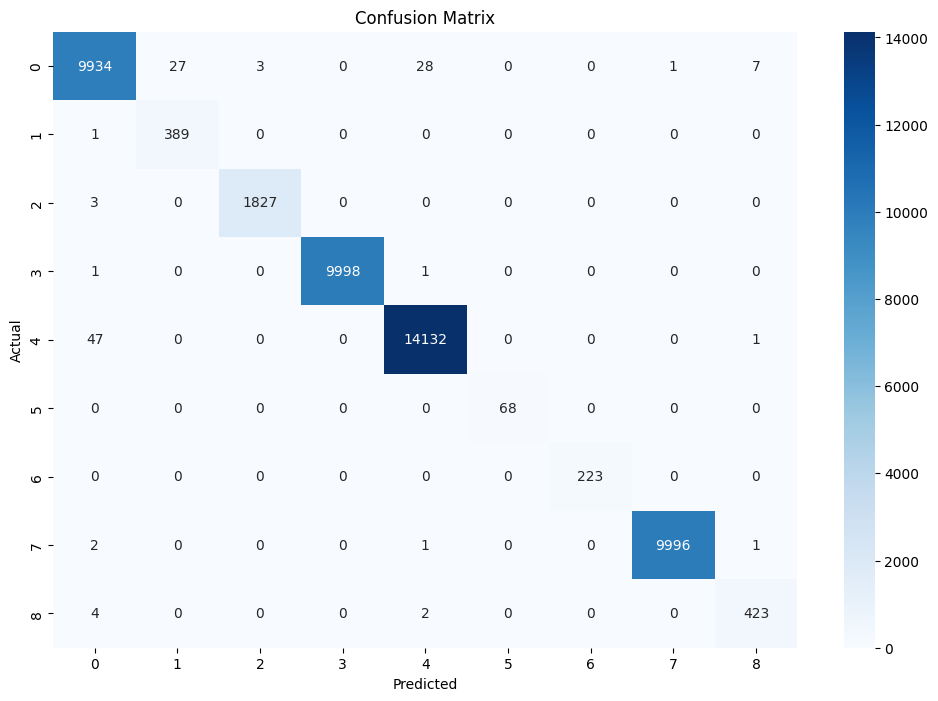

In [74]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [75]:
print_all_accuracy_matrix(stacked_model,"Stacking Classifier")

Accuracy of Stacking Classifier on training set: 0.9994
Accuracy of Stacking Classifier on test set: 0.9991


F1 Score of Stacking Classifier on training set: 0.9966
F1 Score of Stacking Classifier on test set: 0.9942


Recall Score of Stacking Classifier on training set: 0.9967
Recall Score of Stacking Classifier on test set: 0.9944


Precision Score of Stacking Classifier on training set: 0.9965
Precision Score of Stacking Classifier on test set: 0.9939


Classification Report on training set:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     80000
         Bot       0.98      0.98      0.98      1558
 Brute_Force       1.00      1.00      1.00      7320
        DDoS       1.00      1.00      1.00    102411
         DoS       1.00      1.00      1.00    154996
  Heartbleed       1.00      1.00      1.00       273
Infiltration       1.00      1.00      1.00       893
   Port_Scan       1.00      1.00      1.00     72555
  Web_Attack

In [75]:
joblib.dump(stacked_model, 'Models/tst1_stk_classifier.joblib')

['Models/tst1_stk_classifier.joblib']

# DNN

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import joblib

In [70]:
# === Paths ===
MODEL_PATH = "D:\\tf-env\IDS\Models/Models"
DNN_MODEL_PATH = f"{MODEL_PATH}/dnn_ids_model.h5"

In [71]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [72]:
dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_train_cat.shape[1], activation='softmax')
])

In [73]:
dnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

In [74]:
history = dnn.fit(
    X_train_scaled, y_train_cat,
    validation_data=(X_test_scaled, y_test_cat),
    epochs=30,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
737/737 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7591 - loss: 0.6979 - val_accuracy: 0.9329 - val_loss: 0.1927
Epoch 2/30
737/737 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9305 - loss: 0.2078 - val_accuracy: 0.9583 - val_loss: 0.1258
Epoch 3/30
737/737 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9502 - loss: 0.1511 - val_accuracy: 0.9690 - val_loss: 0.0837
Epoch 4/30
737/737 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9660 - loss: 0.1037 - val_accuracy: 0.9783 - val_loss: 0.0599
Epoch 5/30
737/737 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9712 - loss: 0.0874 - val_accuracy: 0.9827 - val_loss: 0.0525
Epoch 6/30
737/737 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9751 - loss: 0.0765 - val_accuracy: 0.9858 - val_loss: 0.0445
Epoch 7/30
737/737 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9761 - loss: 0.0705 - val_accuracy: 0.9845 - val_loss: 0.0450
Epoch 8/30
737/737 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9796 - loss: 0.0602 - val_accuracy: 0.

In [75]:
dnn.save(DNN_MODEL_PATH)

In [76]:
# === Predict DNN مرة واحدة لكل الـ test data ===
dnn_preds = dnn.predict(X_test_scaled, verbose=0)
dnn_labels = np.argmax(dnn_preds, axis=1)

In [77]:
print("Classification Report:")
print(classification_report(y_test, dnn_labels, target_names=le.classes_))

Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      0.97      0.99     10000
         Bot       0.90      1.00      0.94       390
 Brute_Force       0.99      0.99      0.99      1830
        DDoS       1.00      1.00      1.00     10000
         DoS       0.99      1.00      0.99     14180
  Heartbleed       0.99      1.00      0.99        68
Infiltration       0.97      0.98      0.98       223
   Port_Scan       1.00      1.00      1.00     10000
  Web_Attack       0.95      0.98      0.96       429

    accuracy                           0.99     47120
   macro avg       0.98      0.99      0.98     47120
weighted avg       0.99      0.99      0.99     47120



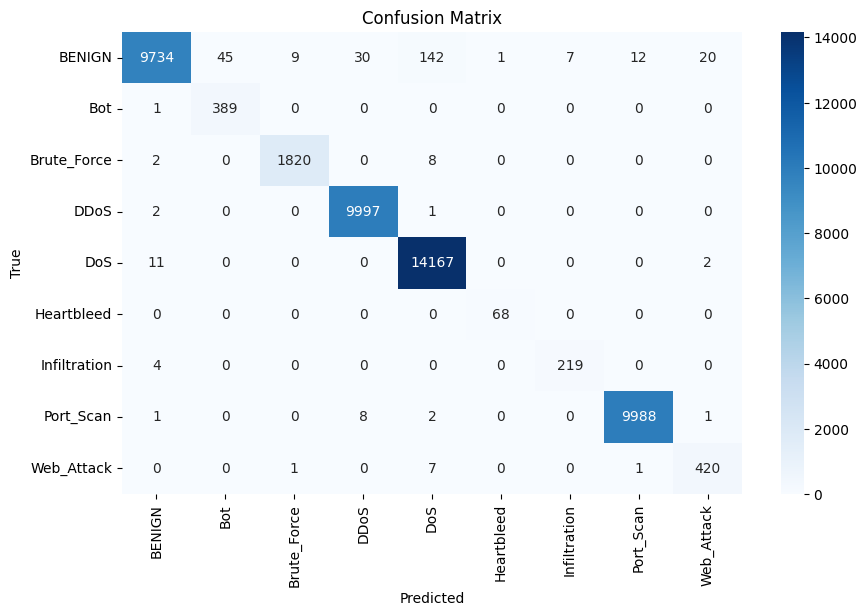

In [78]:
cm = confusion_matrix(y_test, dnn_labels)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [79]:
loss, acc = dnn.evaluate(X_test_scaled, y_test_cat)
print(f"Test Accuracy: {acc:.4f}")

1473/1473 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9937 - loss: 0.0208
Test Accuracy: 0.9933


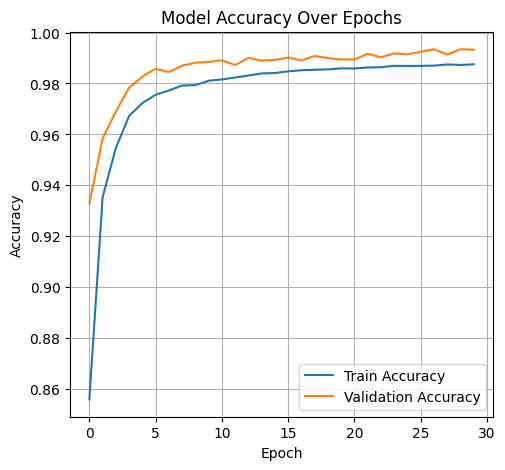

In [80]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

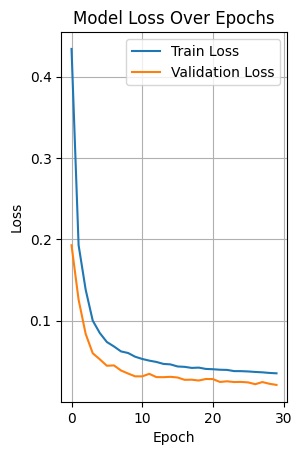

In [81]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [82]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

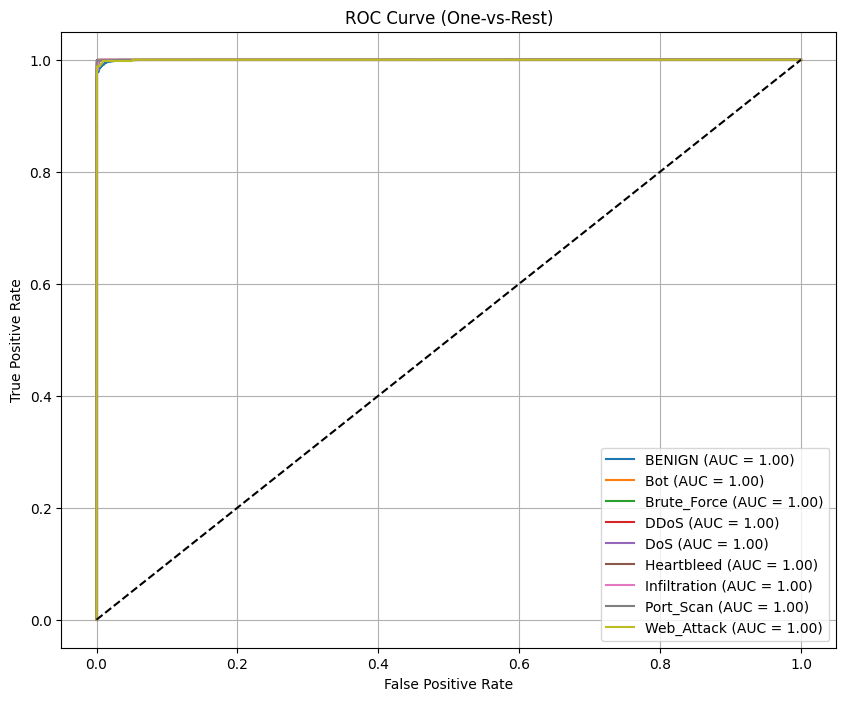

In [83]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# تحويل y_test إلى one-hot
y_test_bin = label_binarize(y_test, classes=range(len(le.classes_)))
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], dnn_preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# رسم ROC لكل كلاس
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'{le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()


In [84]:
print(f"\n✅ Final Test Accuracy: {acc*100:.2f}%")
print(f"📉 Final Test Loss: {loss:.4f}")


✅ Final Test Accuracy: 99.33%
📉 Final Test Loss: 0.0210


In [85]:
with open("classification_report.txt", "w") as f:
    f.write(classification_report(y_test, dnn_labels, target_names=le.classes_))


# Stacking + ISOLATION FOREST

In [ ]:
stacking_model = joblib.load("Models/tst1_stk_classifier.joblib")
DNN_model = joblib.load("Models/dnn_ids_model.h5")
scaler = joblib.load("Scaler/scaler_minmax.save")
features = joblib.load("Features_Order/features_order.pkl")
le = joblib.load("Label Encoder/tst_lb_encoder.pkl")

In [ ]:
X_train_df = pd.DataFrame(X_train_scaled, columns=features)
X_train_df.index = y_train.index  

benign_class = le.transform(['BENIGN'])[0]
X_benign = X_train_df[y_train == benign_class]

In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import IsolationForest

X_train_df = pd.DataFrame(X_train_scaled, columns=features)
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train)

y_train.index = X_train_df.index
benign_class = le.transform(['BENIGN'])[0]
X_benign = X_train_df[y_train == benign_class]

print(f"BENIGN: {X_benign.shape[0]}")

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_benign)

joblib.dump(iso_forest, "Models/isolation_forest.joblib")
print("💾 تم حفظ نموذج Isolation Forest بنجاح ✅")


✅ عدد عينات BENIGN: 40000
💾 تم حفظ نموذج Isolation Forest بنجاح ✅


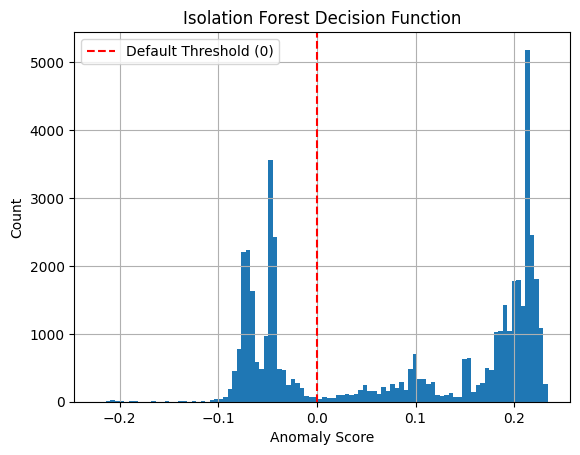

In [103]:
import matplotlib.pyplot as plt

scores = iso_forest.decision_function(X_test_scaled)

plt.hist(scores, bins=100)
plt.axvline(x=0, color='red', linestyle='--', label='Default Threshold (0)')
plt.xlabel("Anomaly Score")
plt.ylabel("Count")
plt.title("Isolation Forest Decision Function")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import joblib
import numpy as np

iso_forest = joblib.load("Models/isolation_forest.joblib")
stacking_model = joblib.load("Models/tst1_stk_classifier.joblib")
le = joblib.load("Label Encoder/tst_lb_encoder.pkl")
scaler = joblib.load("Scaler/scaler_minmax.save")
features = joblib.load("Features_Order/features_order.pkl")

THRESHOLD = -0.000001  
df = pd.read_csv("test/extracted_features_4.csv")  
df = df[features]  
scaled_data = scaler.transform(df)

In [ ]:
for i, sample in enumerate(scaled_data):
    iso_score = iso_forest.decision_function([sample])[0]

    if iso_score < THRESHOLD:
        print(f"[{i+1}] ❌ Unknown Attack (Score: {iso_score:.4f})")
    else:
        pred_index = stacking_model.predict([sample])[0]
        label = le.inverse_transform([pred_index])[0]
        print(f"[{i+1}] ✅ Classified as: {label} (Score: {iso_score:.4f})")


# DNN + Isolation Forest

In [86]:
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import IsolationForest
from tensorflow.keras.models import load_model

# === Load components ===
iso_forest = joblib.load("Models/isolation_forest.joblib")
dnn_model = load_model("Models/dnn_ids_model.h5")
le = joblib.load("Label Encoder/tst_lb_encoder.pkl")
scaler = joblib.load("Scaler/scaler_minmax.save")
features = joblib.load("Features_Order/features_order.pkl")

THRESHOLD = -0.000001  # ضبط حسب الـ histogram


In [98]:
# === Load and prepare CSV
df = pd.read_csv("test/extracted_features_3.csv")
df = df[features]  # تأكد من الترتيب الصحيح
scaled_data = scaler.transform(df)


In [ ]:
for i, sample in enumerate(scaled_data):
    iso_score = iso_forest.decision_function([sample])[0]

    if iso_score < THRESHOLD:
        print(f"[{i+1}] ❌ Unknown Attack (Score: {iso_score:.4f})")
    else:
        pred = dnn_model.predict(np.array([sample]), verbose=0)
        label_index = np.argmax(pred, axis=1)[0]
        label = le.inverse_transform([label_index])[0]
        print(f"[{i+1}] ✅ Classified as: {label} (Score: {iso_score:.4f})")


# Testing

In [76]:
loaded_model = joblib.load('Models/tst1_stk_classifier.joblib')

In [77]:
X_top_features = pd.read_csv('tst1_X_top_Scaled_features.csv')
y_top_features = pd.read_csv('tst1_y_top_features.csv')

In [78]:
print(X_top_features.iloc[0])
print("\n\noutput:",y_top_features.iloc[0]) 

FwdPacketLengthMean        6.796157e-03
FwdPacketLengthMax         1.357021e-02
FlowIATMax                 6.916667e-01
SubflowBwdBytes            1.470993e-03
Init_Win_bytes_backward    3.601074e-03
TotalLengthofBwdPackets    1.470993e-03
FlowPackets/s              5.056239e-08
TotalLengthofFwdPackets    1.126963e-04
BwdPackets/s               3.608886e-08
AveragePacketSize          3.611734e-01
FlowDuration               6.927379e-01
BwdPacketLengthMean        4.421502e-01
SubflowFwdBytes            1.126963e-04
AvgBwdSegmentSize          4.421502e-01
FwdPacketLengthStd         1.585837e-02
AvgFwdSegmentSize          6.796157e-03
DestinationPort            1.220778e-03
BwdHeaderLength            1.809758e-03
PacketLengthMean           4.102229e-01
BwdPacketLengthStd         3.247607e-01
Name: 0, dtype: float64


output: Label    4
Name: 0, dtype: int64


In [81]:
prediction = loaded_model.predict(first_row_df)
print("Predicted class:", prediction[0])

Predicted class: 4


In [82]:
print(X_top_features.iloc[1])
print("\n\noutput:",y_top_features.iloc[1])

FwdPacketLengthMean        3.366518e-04
FwdPacketLengthMax         8.561644e-05
FlowIATMax                 1.666667e-07
SubflowBwdBytes            7.611864e-07
Init_Win_bytes_backward    1.525879e-05
TotalLengthofBwdPackets    7.611864e-07
FlowPackets/s              3.174603e-02
TotalLengthofFwdPackets    6.978099e-07
BwdPackets/s               2.380952e-02
AveragePacketSize          2.121341e-03
FlowDuration               1.666674e-07
BwdPacketLengthMean        1.372782e-03
SubflowFwdBytes            6.978099e-07
AvgBwdSegmentSize          1.372782e-03
FwdPacketLengthStd         0.000000e+00
AvgFwdSegmentSize          3.366518e-04
DestinationPort            2.229445e-02
BwdHeaderLength            1.809758e-04
PacketLengthMean           1.721022e-03
BwdPacketLengthStd         0.000000e+00
Name: 1, dtype: float64


output: Label    7
Name: 1, dtype: int64


In [83]:
first_row_df = X_top_features.head(2).tail(1)

In [84]:
prediction = loaded_model.predict(first_row_df)
print("Predicted class:", prediction[0])

Predicted class: 7


In [80]:
first_row_df.to_csv('test/first1_row_df.csv')

In [81]:
first_row_df

,FwdPacketLengthMean,FwdPacketLengthMax,FlowIATMax,SubflowBwdBytes,Init_Win_bytes_backward,TotalLengthofBwdPackets,FlowPackets/s,TotalLengthofFwdPackets,BwdPackets/s,AveragePacketSize,FlowDuration,BwdPacketLengthMean,SubflowFwdBytes,AvgBwdSegmentSize,FwdPacketLengthStd,AvgFwdSegmentSize,DestinationPort,BwdHeaderLength,PacketLengthMean,BwdPacketLengthStd
1,0.390954,0.496361,0.5875,0.000008,0.003922,0.000008,5.150978e-08,0.004052,5.504684e-08,0.353991,0.681241,0.001754,0.004052,0.001754,0.735294,0.390954,0.984939,0.001737,0.402065,0.000789


# Split Data for testing

In [83]:
first_row_df = X_top_features.head(10)
first_row_df.to_csv('test/first_x_10_row_df.csv', index=False)

In [84]:
first_row_df = y_top_features.head(10)
first_row_df.to_csv('test/first_y_10_row_df.csv', index=False)

In [85]:
first_row_df = X_top_features.head(-10)
first_row_df.to_csv('test/first_x_10_row_df_1.csv', index=False)

In [86]:
first_row_df = y_top_features.head(-10)
first_row_df.to_csv('test/first_y_10_row_df_1.csv', index=False)

In [87]:
middle_rows_X = X_top_features.iloc[15:24]
middle_rows_X.to_csv('test/middle_rows_X_10.csv', index=False)

In [88]:
middle_rows_y = y_top_features.iloc[15:24]
middle_rows_y.to_csv('test/middle_rows_y_10.csv', index=False)

In [89]:
first_row_df = X_top_features.head(1)
first_row_df.to_csv('test/first_row_df.csv', index=False)

In [90]:
first_row_df = y_top_features.head(1)
first_row_df.to_csv('test/first_y_row_df.csv', index=False)

In [91]:
last_rows_X = X_top_features.tail(10)
last_rows_X.to_csv('test/last_rows_X_10.csv', index=False)

In [92]:
last_row_df = y_top_features.tail(10)
last_row_df.to_csv('test/last_rows_y_10.csv', index=False)

# save

In [124]:
features = [
    'Init_Win_bytes_backward',
    'SubflowFwdBytes',
    'FwdPacketLengthMean',
    'FwdPacketLengthStd',
    'FwdPacketLengthMax',
    'TotalLengthofFwdPackets',
    'BwdHeaderLength',
    'AvgFwdSegmentSize',
    'PacketLengthMean',
    'FlowDuration',
    'act_data_pkt_fwd',
    'BwdPackets/s',
    'BwdPacketLengthMin',
    'FwdIATMax',
    'FwdIATMean',
    'FlowIATMax',
    'DestinationPort',
    'FwdIATTotal',
    'TotalFwdPackets',
    'SubflowFwdPackets'
]

joblib.dump(features, 'Features_Order/features_order.pkl')

['Features_Order/features_order.pkl']

# Testing Stacking

In [85]:
loaded_model = joblib.load('Models/tst1_stk_classifier.joblib')

In [86]:
features = [
    'FwdPacketLengthMean',
    'FwdPacketLengthMax',
    'FlowIATMax',
    'SubflowBwdBytes',
    'Init_Win_bytes_backward',
    'TotalLengthofBwdPackets',
    'FlowPackets/s',
    'TotalLengthofFwdPackets',
    'BwdPackets/s',
    'AveragePacketSize',
    'FlowDuration',
    'BwdPacketLengthMean',
    'SubflowFwdBytes',
    'AvgBwdSegmentSize',
    'FwdPacketLengthStd',
    'AvgFwdSegmentSize',
    'DestinationPort',
    'BwdHeaderLength',
    'PacketLengthMean',
    'BwdPacketLengthStd'
]


In [87]:
joblib.dump(features, 'Features_Order/features_order.pkl')
# scaler = joblib.load("scaler.pkl")
scaler = joblib.load('Scaler/scaler_minmax.save')

In [88]:
def make_prediction():
    user_input={}
    for column in features:
        value = input(f"Enter value for {column}: ")
        user_input[column] = float(value)if 'float' in str(df.dtypes[column]) else int(value)
        
    user_data = pd.DataFrame([user_input])
     # ✅ Apply scaling
    scaled_data = scaler.transform(user_data)
    prediction = loaded_model.predict(scaled_data)
    
    print(f"Predicted class: {prediction[0]}")
    

In [89]:
make_prediction()

Predicted class: 4


# testing DNN

In [91]:
from tensorflow.keras.models import load_model
import joblib
import pandas as pd
import numpy as np

# === تحميل النموذج DNN
dnn_model = load_model("Models/dnn_ids_model.h5")

# === تحميل السكيلر (نفس اللي استخدمته وقت التدريب)
scaler = joblib.load("Scaler/scaler_minmax.save")

# === تحميل ترتيب الخصائص
features = joblib.load("Features_Order/features_order.pkl")

# === تحميل الـ LabelEncoder لو هتستخدمه
le = joblib.load("Label Encoder/tst_lb_encoder.pkl")  # لو حفظته قبل كده


In [92]:
def make_dnn_prediction():
    user_input = {}
    for column in features:
        value = input(f"Enter value for {column}: ")
        user_input[column] = float(value)

    user_data = pd.DataFrame([user_input])

    # ✅ Apply scaling
    scaled_data = scaler.transform(user_data)

    # ✅ تنبؤ بالاحتمالات
    probs = dnn_model.predict(scaled_data)

    # ✅ تحويل التوقع إلى label
    pred_index = np.argmax(probs, axis=1)[0]

    # ✅ لو عندك LabelEncoder محفوظ:
    try:
        pred_label = le.inverse_transform([pred_index])[0]
    except:
        pred_label = pred_index  # لو مفيش le

    print(f"\n🧠 Predicted class: {pred_label}")


In [94]:
make_dnn_prediction()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step

🧠 Predicted class: BENIGN


# Hybrid Detection

In [ ]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np
import pandas as pd

# === تحميل النماذج والملفات ===
dnn_model = load_model("Final_Model/dnn_ids_model.h5")
stacking_model = joblib.load("Models/tst1_stk_classifier.joblib")
scaler = joblib.load("Scaler/scaler_minmax.save")
features = joblib.load("Features_Order/features_order.pkl")
le = joblib.load("Label Encoder/tst_lb_encoder.pkl")   # تأكد إنه متسجل وقت التدريب

# === hybrid prediction function ===
def make_hybrid_prediction():
    user_input = {}
    for column in features:
        value = input(f"Enter value for {column}: ")
        user_input[column] = float(value)

    user_df = pd.DataFrame([user_input])
    scaled_data = scaler.transform(user_df)

    # === تنبؤ DNN ===
    dnn_probs = dnn_model.predict(scaled_data)
    dnn_pred_index = np.argmax(dnn_probs)
    dnn_conf = np.max(dnn_probs)
    dnn_label = le.inverse_transform([dnn_pred_index])[0]

    # === تنبؤ stacking ===
    stacking_pred_index = stacking_model.predict(scaled_data)[0]
    stacking_label = le.inverse_transform([stacking_pred_index])[0]

    # === الدمج الذكي
    if dnn_pred_index == stacking_pred_index:
        final_pred = dnn_label
        decision = "✅ النموذجين متفقين"
    elif dnn_conf > 0.85:
        final_pred = dnn_label
        decision = "🧠 تم الاعتماد على DNN (ثقة عالية)"
    else:
        final_pred = stacking_label
        decision = "📊 تم الاعتماد على Stacking (DNN ثقة منخفضة)"

    # === طباعة النتائج
    print("\n📋 نتائج التوقع:")
    print(f"🔹 DNN توقع: {dnn_label} (ثقة = {dnn_conf:.2f})")
    print(f"🔸 Stacking توقع: {stacking_label}")
    print(f"\n✅ التوقع النهائي: {final_pred}")
    print(f"📌 القرار: {decision}")




In [ ]:
# === تشغيل
make_hybrid_prediction()

# CSV

In [ ]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np
import pandas as pd

# === تحميل النماذج والملفات ===
dnn_model = load_model("Final_Model/dnn_ids_model.h5")
stacking_model = joblib.load("Models/tst1_stk_classifier.joblib")
scaler = joblib.load("Scaler/scaler_minmax.save")
features = joblib.load("Features_Order/features_order.pkl")
le = joblib.load("Label Encoder/tst_lb_encoder.pkl")

# === توقع من ملف CSV ===
def predict_from_csv(csv_path):
    # تحميل البيانات من الملف
    df = pd.read_csv(csv_path)

    # التأكد إن الأعمدة مرتبة صح
    df = df[features]

    # Apply scaling
    scaled_data = scaler.transform(df)

    final_predictions = []
    decisions = []

    for i in range(len(df)):
        sample = scaled_data[i].reshape(1, -1)

        # DNN prediction
        dnn_probs = dnn_model.predict(sample, verbose=0)
        dnn_pred_index = np.argmax(dnn_probs)
        dnn_conf = np.max(dnn_probs)
        dnn_label = le.inverse_transform([dnn_pred_index])[0]

        # Stacking prediction
        stacking_pred_index = stacking_model.predict(sample)[0]
        stacking_label = le.inverse_transform([stacking_pred_index])[0]

        # Decision logic
        if dnn_pred_index == stacking_pred_index:
            final_pred = dnn_label
            decision = "BOTH"
        elif dnn_conf > 0.85:
            final_pred = dnn_label
            decision = "DNN"
        else:
            final_pred = stacking_label
            decision = "Stacking "

        final_predictions.append(final_pred)
        decisions.append(decision)

    # عرض النتائج
    df_result = df.copy()
    df_result["Hybrid_Prediction"] = final_predictions
    df_result["Decision_Source"] = decisions

    print("\n✅ ✅ تم التنبؤ على كل الصفوف:")
    print(df_result[["Hybrid_Prediction", "Decision_Source"]].head())

    # حفظ النتائج في ملف جديد لو تحب
    df_result.to_csv("predicted_results.csv", index=False)
    print("\n📁 النتائج محفوظة في: predicted_results.csv")

In [17]:
predict_from_csv("../extracted_features_1.csv")


✅ ✅ تم التنبؤ على كل الصفوف:
  Hybrid_Prediction Decision_Source
0            BENIGN            BOTH
1            BENIGN            BOTH
2            BENIGN            BOTH
3            BENIGN            BOTH
4            BENIGN            BOTH

📁 النتائج محفوظة في: predicted_results.csv
